# Restaurant Revenue Prediction

## Goal:
Predict annual restaurant sales based on objective measurements

## Data:
Provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants.

- Id : Restaurant id. 
- Open Date : opening date for a restaurant
- City : City that the restaurant is in. Note that there are unicode in the names. 
- City Group: Type of the city. Big cities, or Other. 
- Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
- P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
 

### Target variable:
revenue : The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. 


### Import Packages needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.linear_model import Ridge,Lasso,ElasticNet,ElasticNetCV,RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.svm import SVR


from sklearn.preprocessing import OneHotEncoder,LabelEncoder,PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectFromModel,RFECV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Read data to pandas dataframe

In [2]:
rest_df = pd.read_csv("Restaurent-revenue-train.csv")
rest_df.head()

Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

In [3]:
rest_df.shape

(137, 43)

In [4]:
#Reading dataset for the test
test_df = pd.read_csv("Restaurent_revenue_test.csv")
test_df.head()

Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  \
0   0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   1   
1   1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   2   
2   2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   
3   3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   
4   4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   

   ...  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  
0  ...  2.0  3.0    0    0    0    0    0    0    0    0  
1  ...  1.0  3.0    0    0    0    0    0    0    0    0  
2  ...  2.0  3.0    0    0    0    0    0    0    0    0  
3  ...  2.0  3.0    0    4    0    0    0    0    0    0  
4  ...  5.0  3.0    0    0    0    0    0    0    0    0  

[5 rows x 42 columns]

In [5]:
test_df.shape

(100000, 42)

In [6]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [7]:
rest_df.describe()

Id          P1          P2          P3          P4          P5  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean    68.000000    4.014599    4.408759    4.317518    4.372263    2.007299   
std     39.692569    2.910391    1.514900    1.032337    1.016462    1.209620   
min      0.000000    1.000000    1.000000    0.000000    3.000000    1.000000   
25%     34.000000    2.000000    4.000000    4.000000    4.000000    1.000000   
50%     68.000000    3.000000    5.000000    4.000000    4.000000    2.000000   
75%    102.000000    4.000000    5.000000    5.000000    5.000000    2.000000   
max    136.000000   12.000000    7.500000    7.500000    7.500000    8.000000   

               P6          P7          P8          P9  ...         P29  \
count  137.000000  137.000000  137.000000  137.000000  ...  137.000000   
mean     3.357664    5.423358    5.153285    5.445255  ...    3.135036   
std      2.134235    2.296809    1.858567    1.834793  ...    1.680887   
min      1.000000    1.000000    1.000000    4.000000  ...    0.000000   
25%      2.000000    5.000000    4.000000    4.000000  ...    2.500000   
50%      3.000000    5.000000    5.000000    5.000000  ...    3.000000   
75%      4.000000    5.000000    5.000000    5.000000  ...    3.000000   
max     10.000000   10.000000   10.000000   10.000000  ...    7.500000   

              P30         P31         P32         P33         P34         P35  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean     2.729927    1.941606    2.525547    1.138686    2.489051    2.029197   
std      5.536647    3.512093    5.230117    1.698540    5.165093    3.436272   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      4.000000    3.000000    3.000000    2.000000    3.000000    4.000000   
max     25.000000   15.000000   25.000000    6.000000   24.000000   15.000000   

              P36         P37       revenue  
count  137.000000  137.000000  1.370000e+02  
mean     2.211679    1.116788  4.453533e+06  
std      4.168211    1.790768  2.576072e+06  
min      0.000000    0.000000  1.149870e+06  
25%      0.000000    0.000000  2.999068e+06  
50%      0.000000    0.000000  3.939804e+06  
75%      3.000000    2.000000  5.166635e+06  
max     20.000000    8.000000  1.969694e+07  

[8 rows x 39 columns]

In [8]:
#checking for null values present in the train data
rest_df.isnull().any()

Id            False
Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
revenue       False
dtype: bool

### Univariate analysis

#### Analysis on 'Type' Feature

/home/paul/.virtualenvs/aiml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


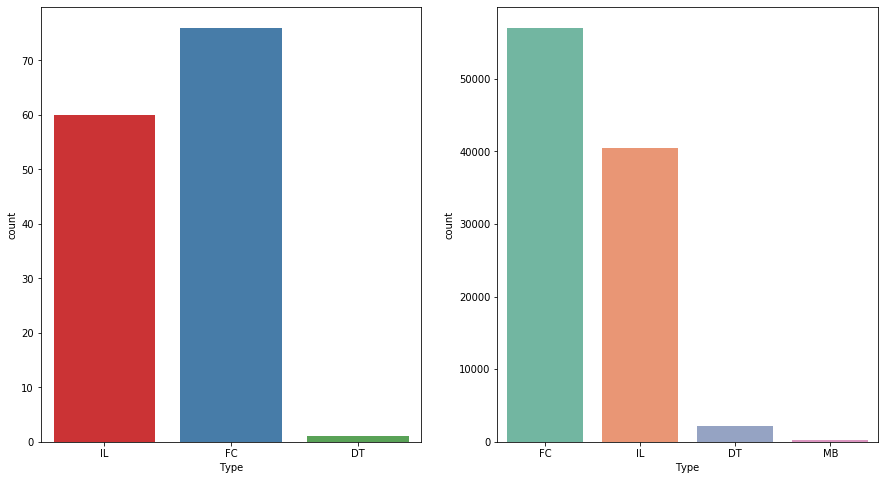

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
f1 = sns.countplot(rest_df['Type'],palette="Set1",ax=ax[0])
f2 = sns.countplot(test_df['Type'],palette="Set2",ax=ax[1])
fig.show()

As we can see, we may have more data on the 'Food court' and 'InLine' restaurents but a very little data on 'DriveThrough' restaurent and no data in the training set for 'MB'(mobile) restaurents and some data are present in the test dataset.<br>
Since our training data doesnt have 'MB' type, we can replace the 'MB' type in the test data with the 'DT'

In [10]:
#replacing the Type 'MB' in the test data with the Type 'DT'
test_df.loc[test_df['Type']=='MB','Type'] = 'DT'
test_df[test_df['Type']=='MB']

Empty DataFrame
Columns: [Id, Open Date, City, City Group, Type, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, P17, P18, P19, P20, P21, P22, P23, P24, P25, P26, P27, P28, P29, P30, P31, P32, P33, P34, P35, P36, P37]
Index: []

[0 rows x 42 columns]

In [11]:
test_df[test_df['Type']=='DT']['Type'].count()

2534

#### Analysis on the 'City Group' feature

/home/paul/.virtualenvs/aiml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


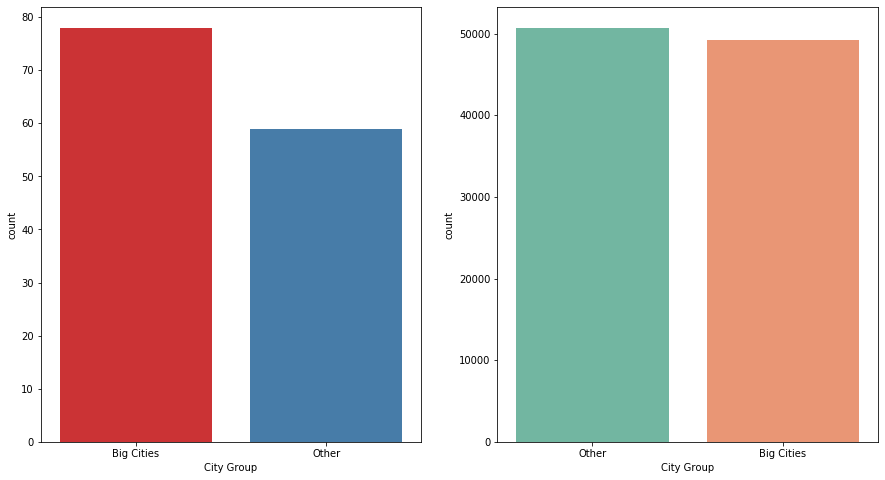

In [12]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
f1= sns.countplot(rest_df['City Group'],palette="Set1",ax=ax[0])
f2= sns.countplot(test_df['City Group'],palette="Set2",ax=ax[1])
fig.show()

We have almost a balanced data regarding the city group

#### Analysis on the 'City' feature

In [13]:
rest_df['City'].nunique(),test_df['City'].nunique()

(34, 57)

we have many City names in both the test and train datasets and there are more new cities in the test data than the train data. so this attribute is not much of help in predicting the revenue of the restaurents. so we can drop this from our model building.

In [14]:
rest_df.drop('City',axis=1,inplace=True)
test_df.drop('City',axis=1,inplace=True)

In [15]:
rest_df.head()

Id   Open Date  City Group Type  P1   P2   P3   P4  P5  P6  ...  P29  P30  \
0   0  07/17/1999  Big Cities   IL   4  5.0  4.0  4.0   2   2  ...  3.0    5   
1   1  02/14/2008  Big Cities   FC   4  5.0  4.0  4.0   1   2  ...  3.0    0   
2   2  03/09/2013       Other   IL   2  4.0  2.0  5.0   2   3  ...  3.0    0   
3   3  02/02/2012       Other   IL   6  4.5  6.0  6.0   4   4  ...  7.5   25   
4   4  05/09/2009       Other   IL   3  4.0  3.0  4.0   2   2  ...  3.0    5   

   P31  P32  P33  P34  P35  P36  P37    revenue  
0    3    4    5    5    4    3    4  5653753.0  
1    0    0    0    0    0    0    0  6923131.0  
2    0    0    0    0    0    0    0  2055379.0  
3   12   10    6   18   12   12    6  2675511.0  
4    1    3    2    3    4    3    3  4316715.0  

[5 rows x 42 columns]

#### Analysis on the 'Open Date' feature

In [16]:
#'Open Date' column is currently string format..lets convert the 'Open Date' column to a python Date format 
rest_df['Open Date'] = pd.to_datetime(rest_df['Open Date'])                                     

In [17]:
rest_df['Open Date'].head()

0   1999-07-17
1   2008-02-14
2   2013-03-09
3   2012-02-02
4   2009-05-09
Name: Open Date, dtype: datetime64[ns]

In [18]:
test_df['Open Date'] = pd.to_datetime(test_df['Open Date']) 
test_df['Open Date'].head()

0   2011-01-22
1   2011-03-18
2   2013-10-30
3   2013-05-06
4   2013-07-31
Name: Open Date, dtype: datetime64[ns]

In [19]:
#coverting these date column to no.of days

current_date = pd.Timestamp.now().normalize()

#current_date= datetime.strftime(current_date,'%Y-%m-%d')
print(current_date)
print(type(current_date))

2021-09-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
rest_df['Days_Open'] = current_date - rest_df['Open Date']
rest_df['Days_Open'].head()

0   8103 days
1   4969 days
2   3119 days
3   3520 days
4   4519 days
Name: Days_Open, dtype: timedelta64[ns]

In [21]:
test_df['Days_Open'] = current_date - test_df['Open Date']
test_df['Days_Open'].head()

0   3896 days
1   3841 days
2   2884 days
3   3061 days
4   2975 days
Name: Days_Open, dtype: timedelta64[ns]

In [22]:
rest_df.drop('Open Date',axis=1,inplace=True)
test_df.drop('Open Date',axis=1,inplace=True)

In [23]:
rest_df['Days_Open'] = rest_df['Days_Open'].dt.days
test_df['Days_Open'] = test_df['Days_Open'].dt.days
rest_df.head()

Id  City Group Type  P1   P2   P3   P4  P5  P6  P7  ...  P30  P31  P32  \
0   0  Big Cities   IL   4  5.0  4.0  4.0   2   2   5  ...    5    3    4   
1   1  Big Cities   FC   4  5.0  4.0  4.0   1   2   5  ...    0    0    0   
2   2       Other   IL   2  4.0  2.0  5.0   2   3   5  ...    0    0    0   
3   3       Other   IL   6  4.5  6.0  6.0   4   4  10  ...   25   12   10   
4   4       Other   IL   3  4.0  3.0  4.0   2   2   5  ...    5    1    3   

   P33  P34  P35  P36  P37    revenue  Days_Open  
0    5    5    4    3    4  5653753.0       8103  
1    0    0    0    0    0  6923131.0       4969  
2    0    0    0    0    0  2055379.0       3119  
3    6   18   12   12    6  2675511.0       3520  
4    2    3    4    3    3  4316715.0       4519  

[5 rows x 42 columns]

In [24]:
rest_df['Days_Open'].dtype

dtype('int64')

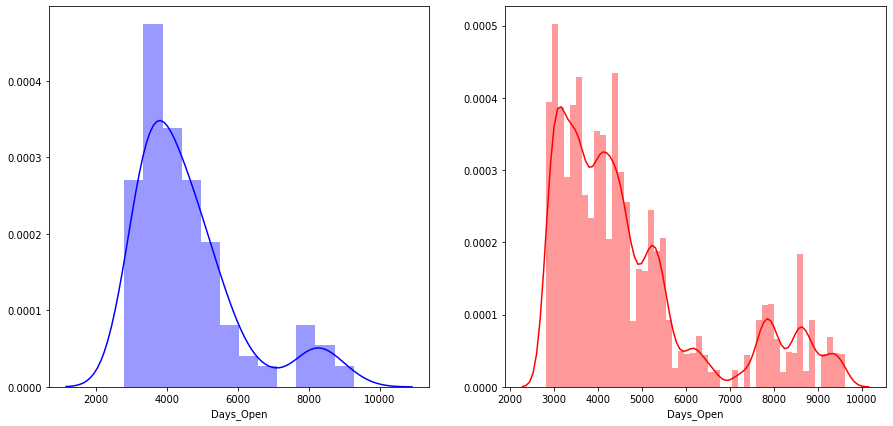

In [25]:
#Lets plot the column 'Days_Open'
fig,ax= plt.subplots(1,2,figsize=(15,7))

f1= sns.distplot(rest_df['Days_Open'],color='blue',ax=ax[0])
f2= sns.distplot(test_df['Days_Open'],color='red',ax=ax[1])

Disturbutions of data look very different in train and test data. In the train data , we can see two peaks but in test there are multiple peaks indicating a gaussian mixture.

#### Analysis Id feature

In [26]:
#Id feature is not contributing anything to determine the revenue of the restaurent. 
#It is just the identification of the restaurent, so we can drop that feature 
rest_df.drop('Id',axis=1,inplace=True)
rest_df.head()

City Group Type  P1   P2   P3   P4  P5  P6  P7  P8  ...  P30  P31  P32  \
0  Big Cities   IL   4  5.0  4.0  4.0   2   2   5   4  ...    5    3    4   
1  Big Cities   FC   4  5.0  4.0  4.0   1   2   5   5  ...    0    0    0   
2       Other   IL   2  4.0  2.0  5.0   2   3   5   5  ...    0    0    0   
3       Other   IL   6  4.5  6.0  6.0   4   4  10   8  ...   25   12   10   
4       Other   IL   3  4.0  3.0  4.0   2   2   5   5  ...    5    1    3   

   P33  P34  P35  P36  P37    revenue  Days_Open  
0    5    5    4    3    4  5653753.0       8103  
1    0    0    0    0    0  6923131.0       4969  
2    0    0    0    0    0  2055379.0       3119  
3    6   18   12   12    6  2675511.0       3520  
4    2    3    4    3    3  4316715.0       4519  

[5 rows x 41 columns]

#### Analysis Columns from P1 to P37

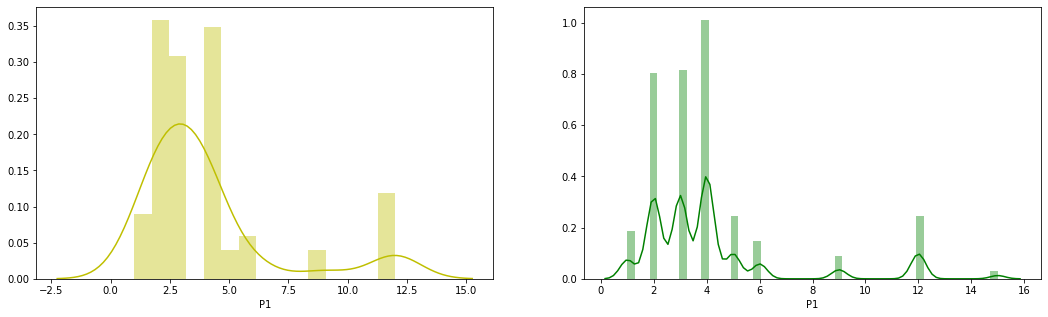

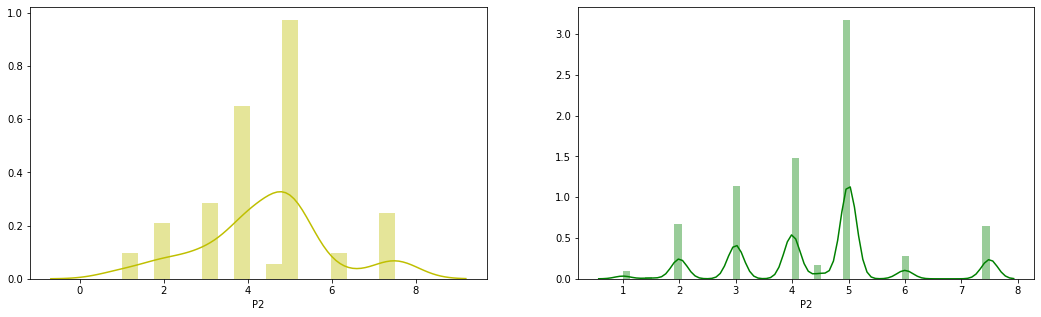

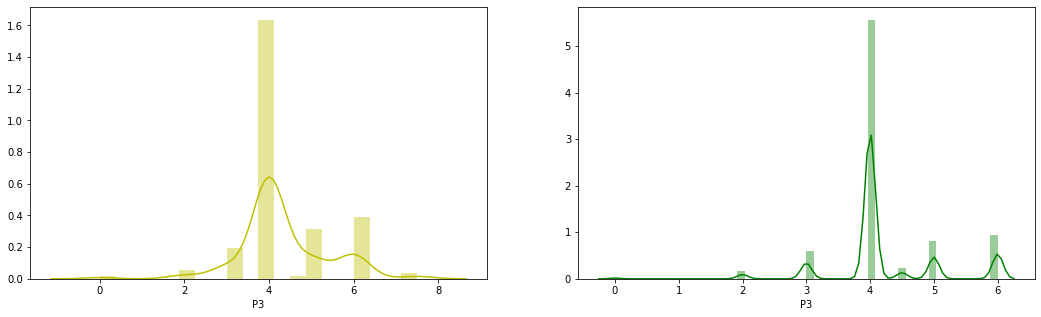

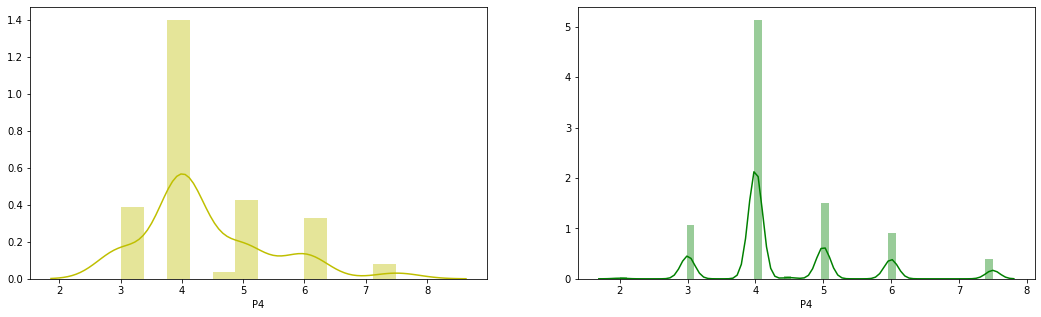

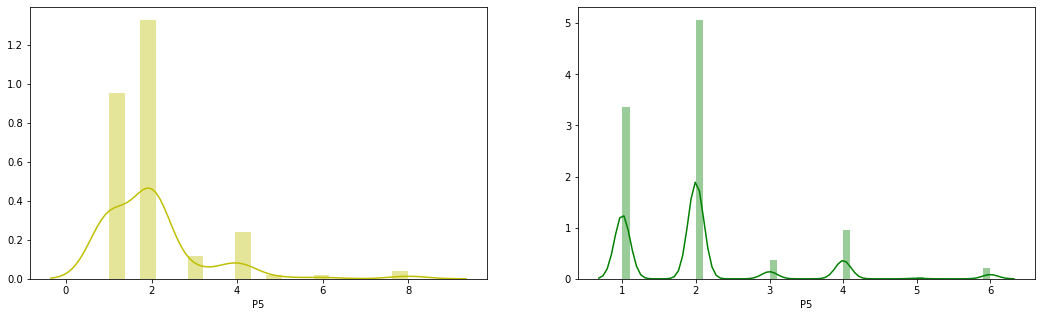

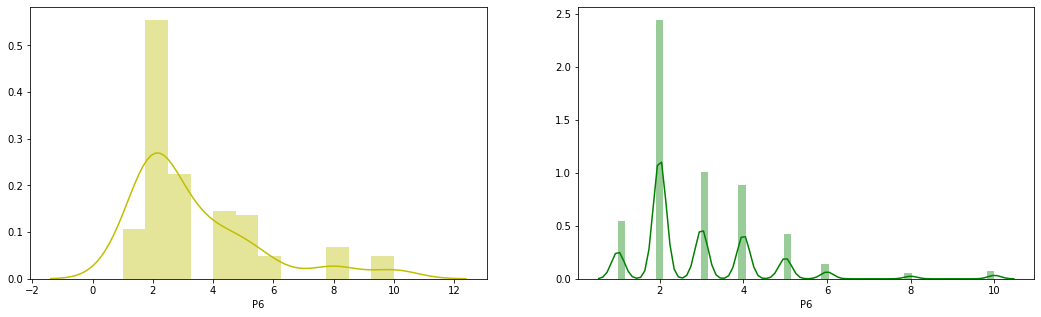

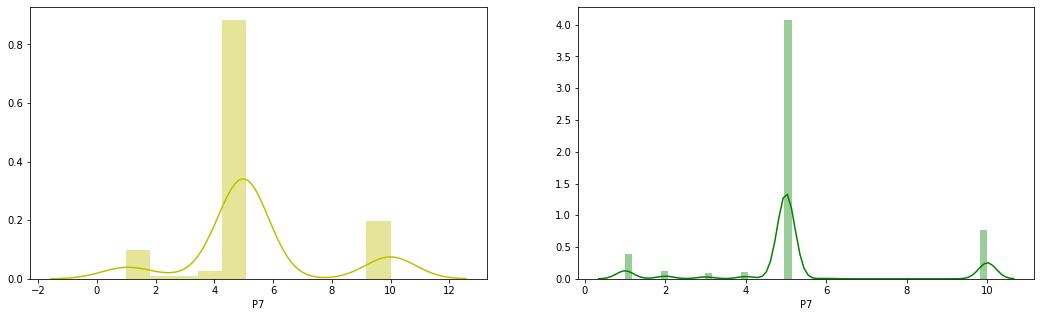

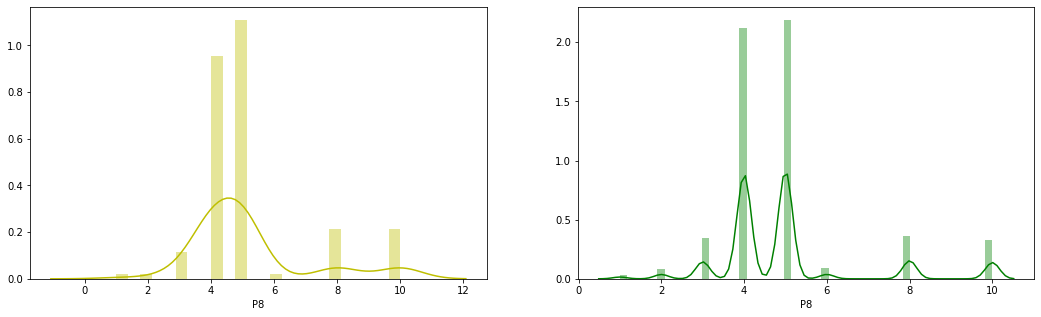

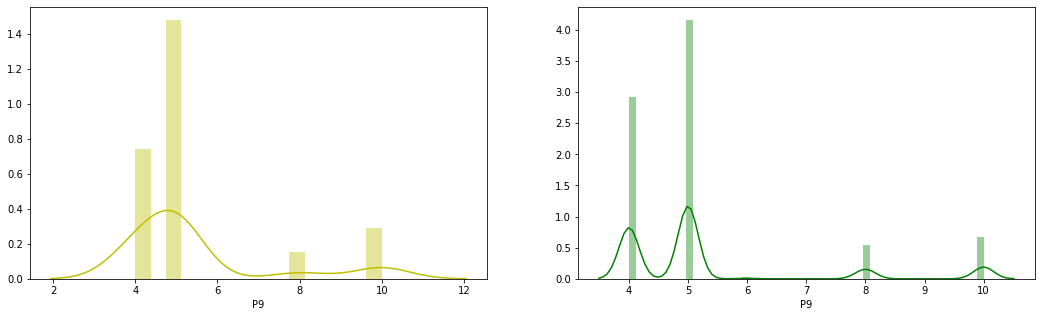

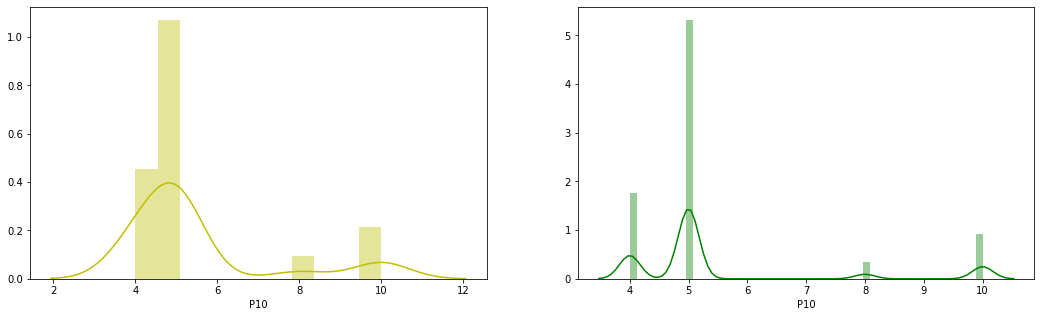

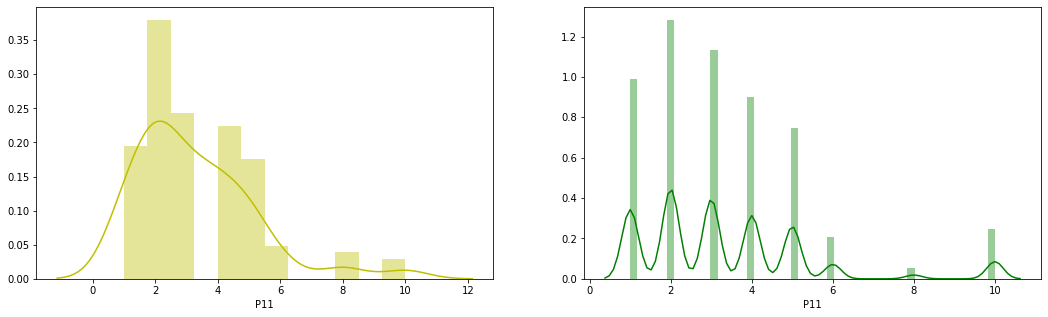

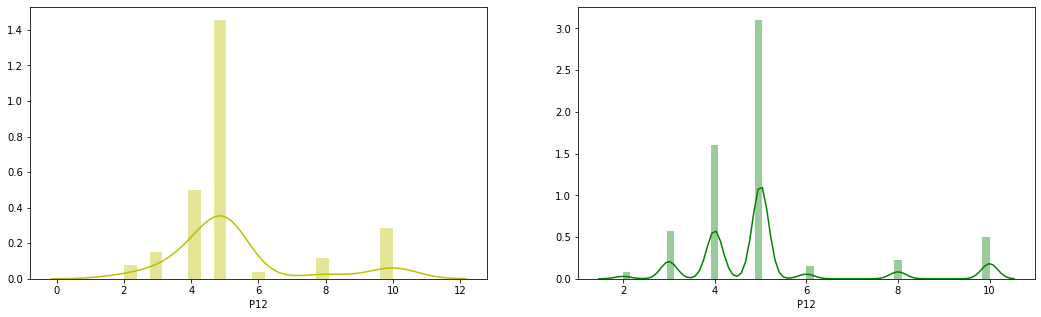

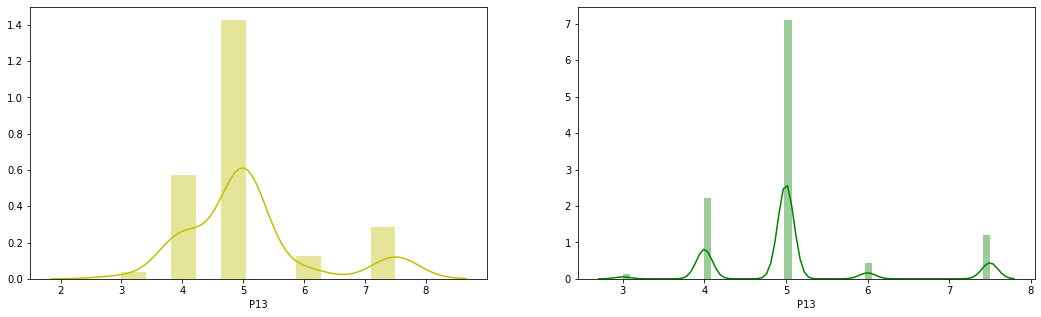

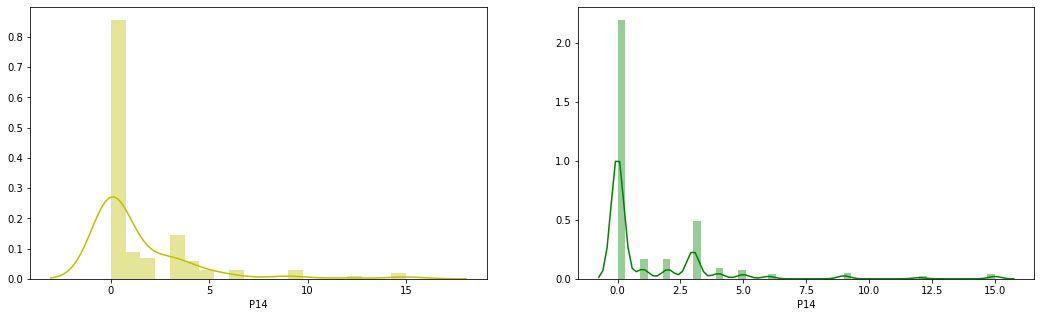

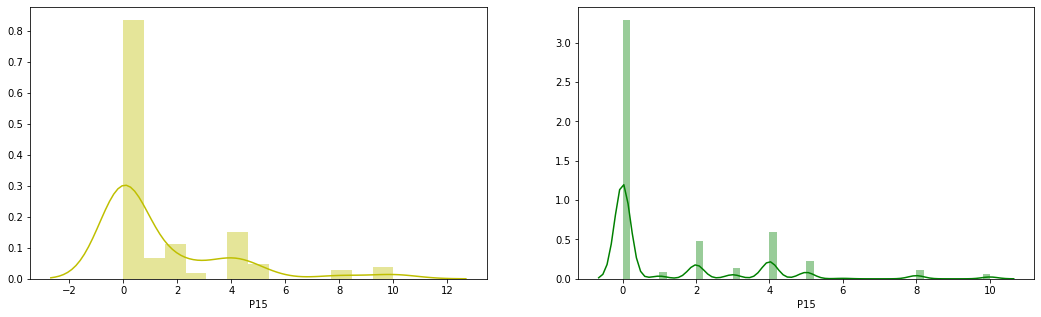

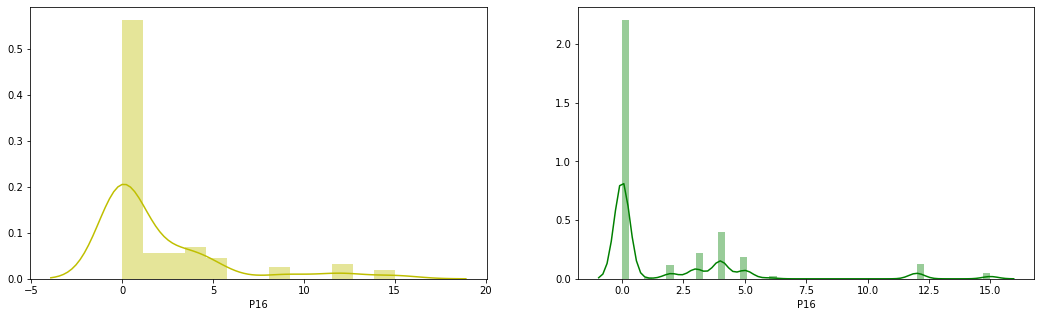

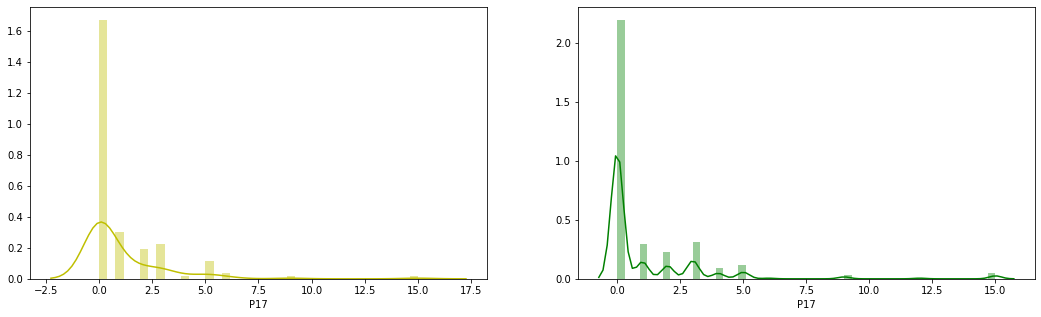

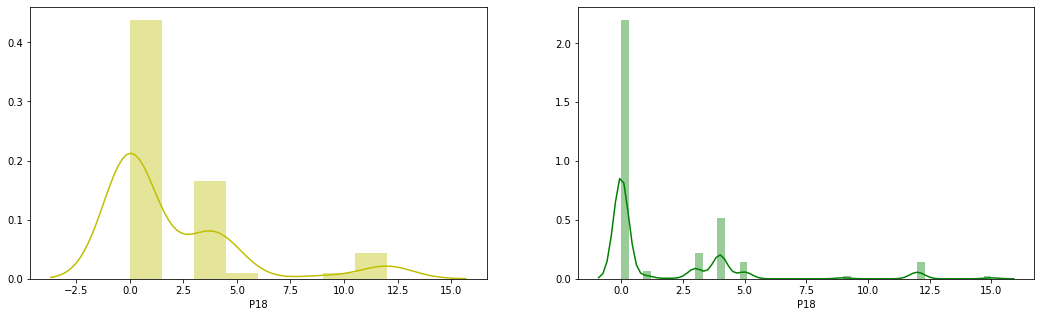

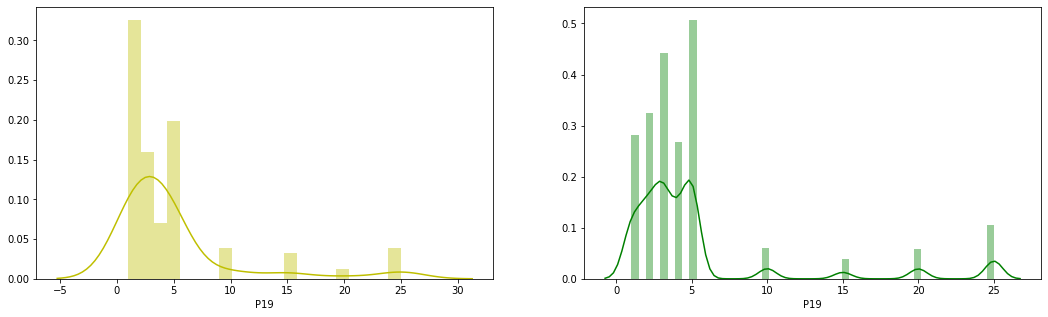

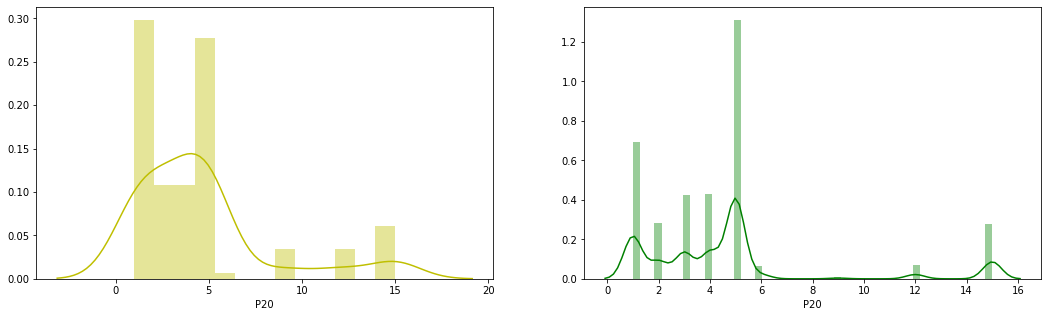

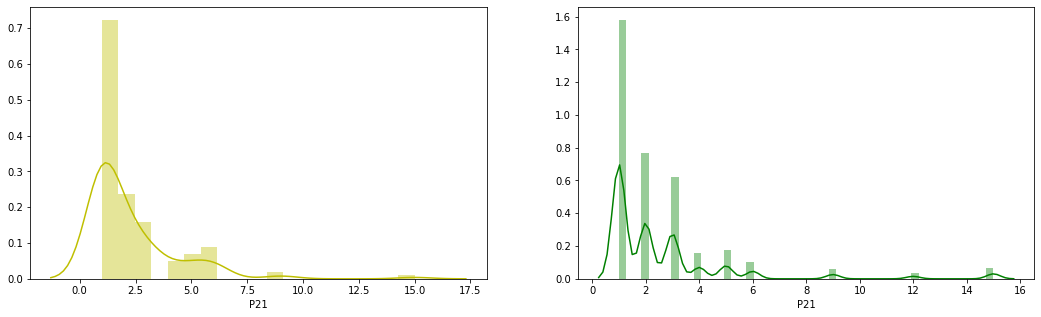

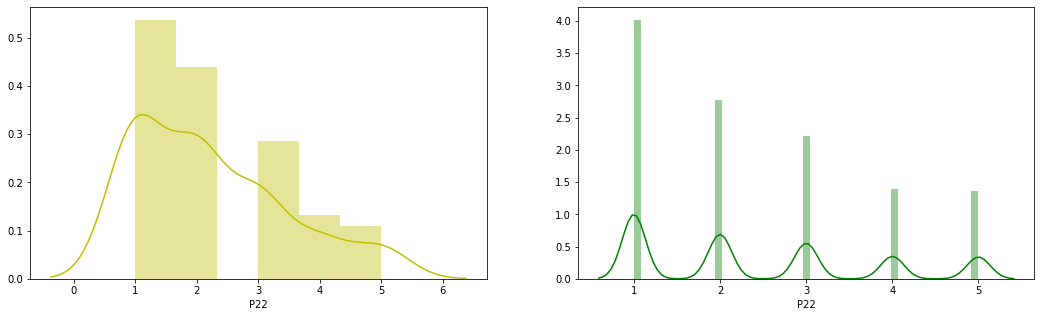

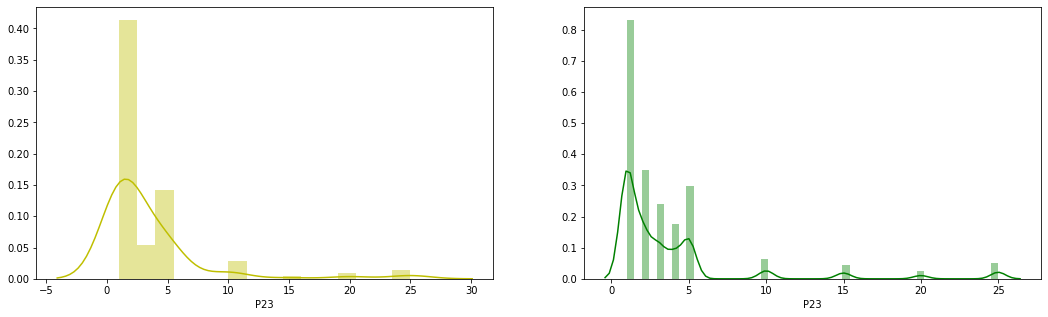

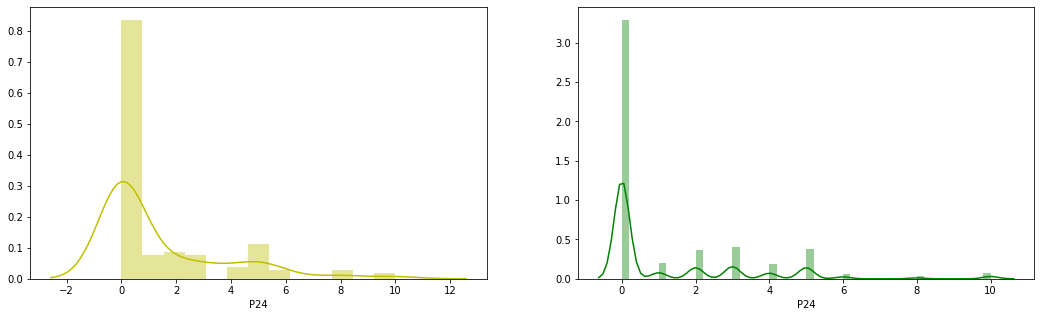

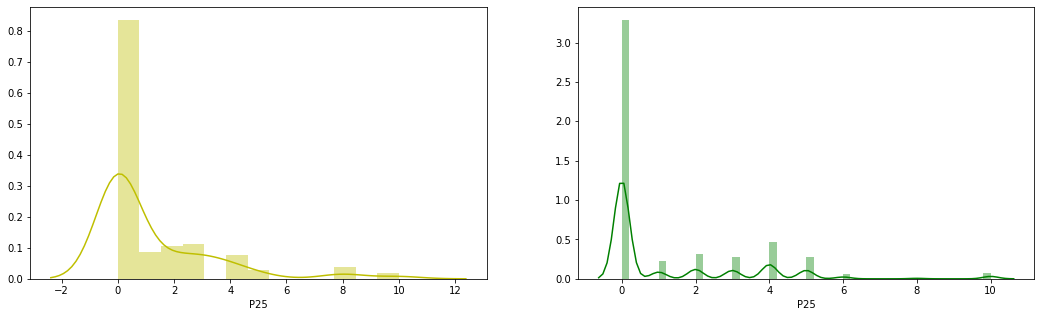

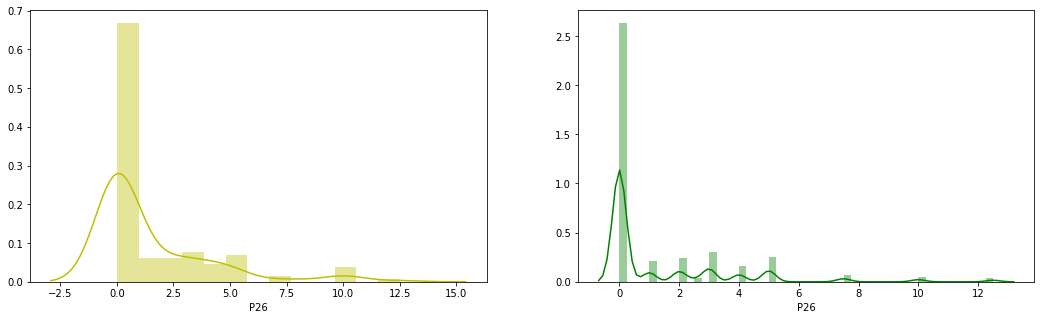

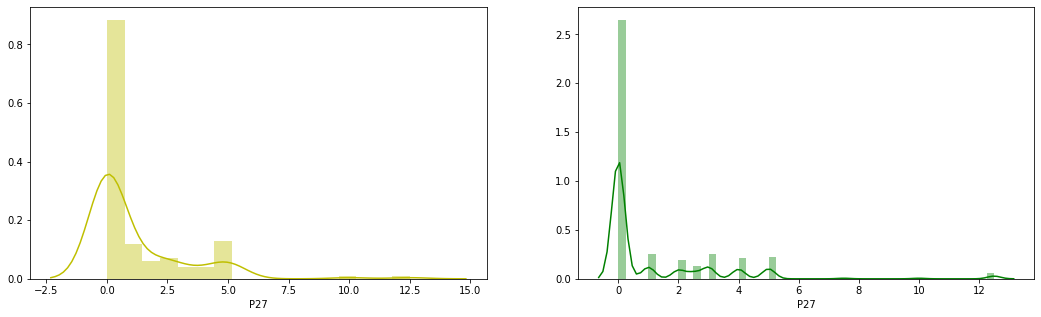

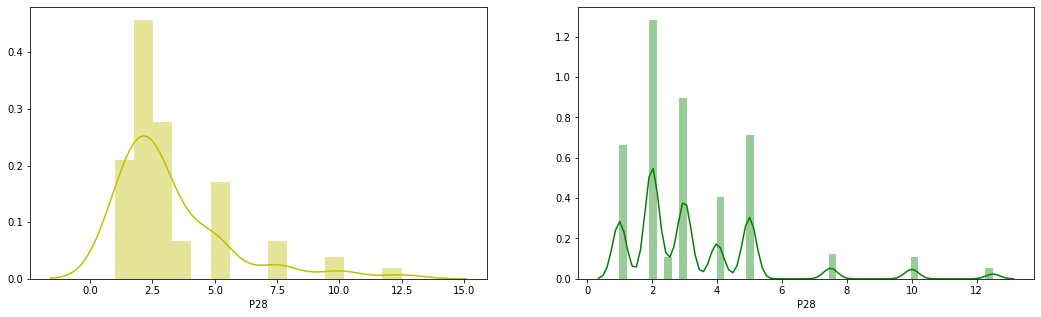

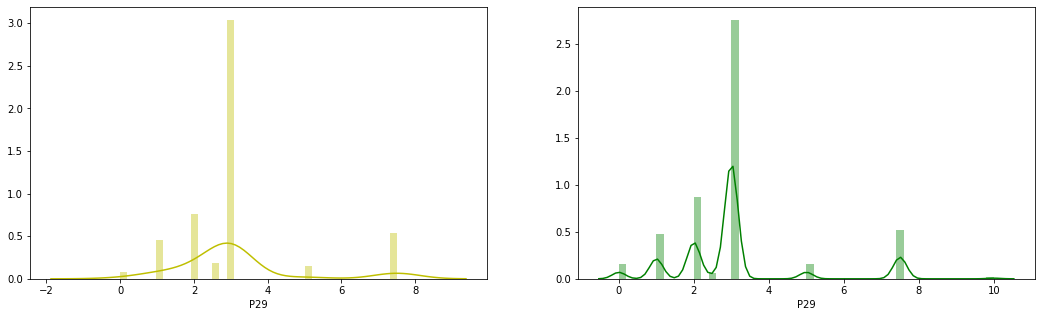

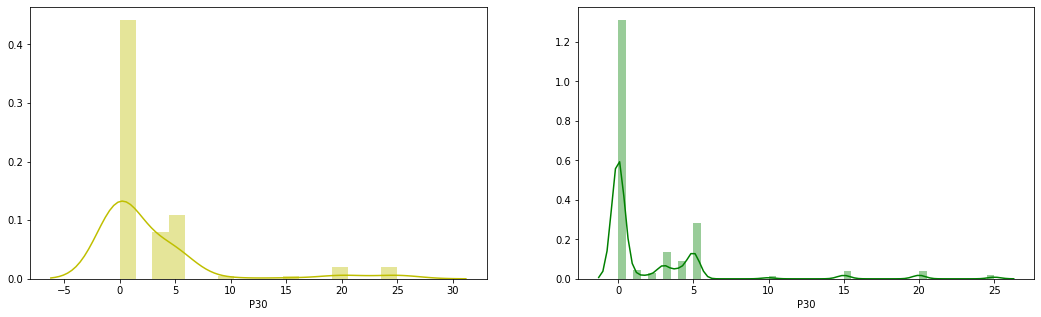

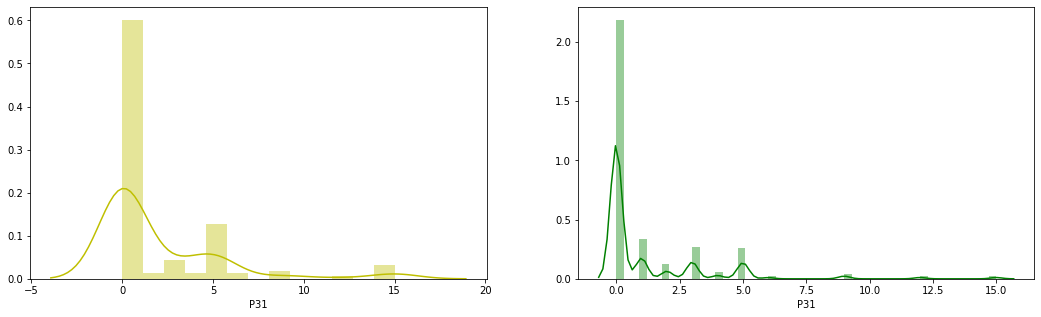

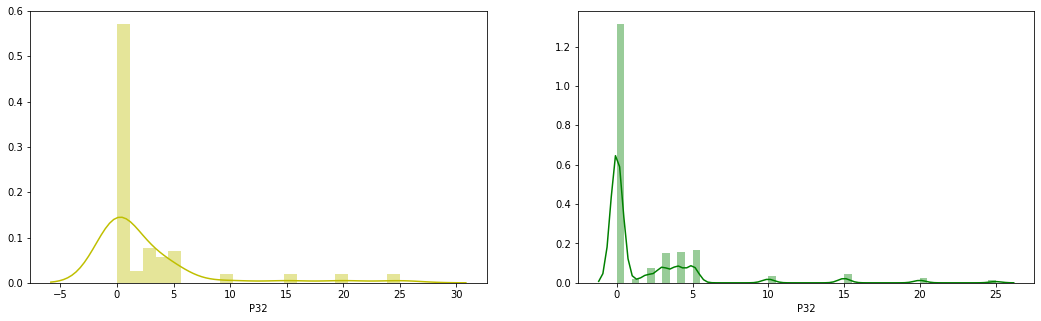

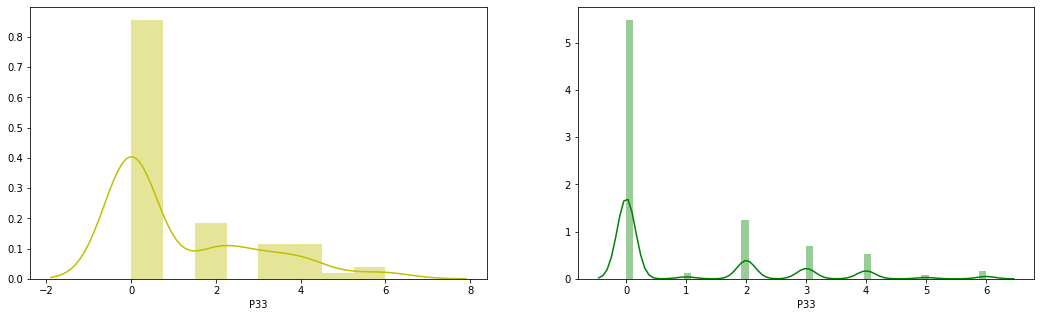

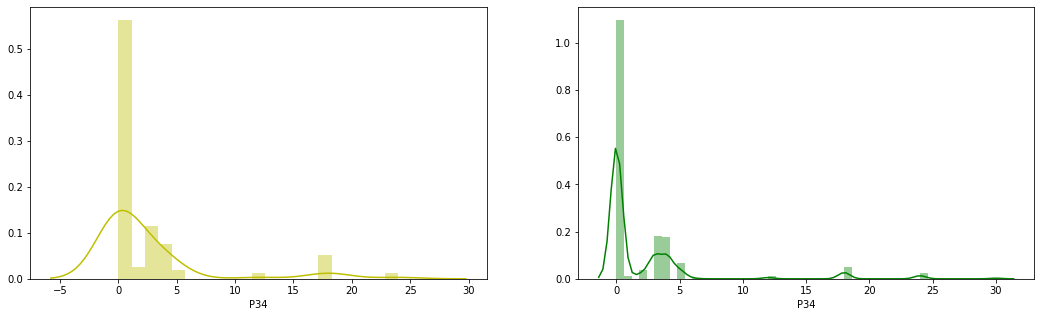

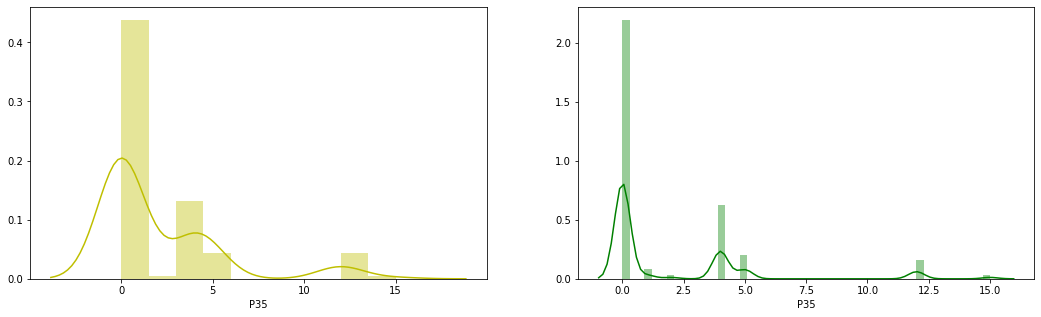

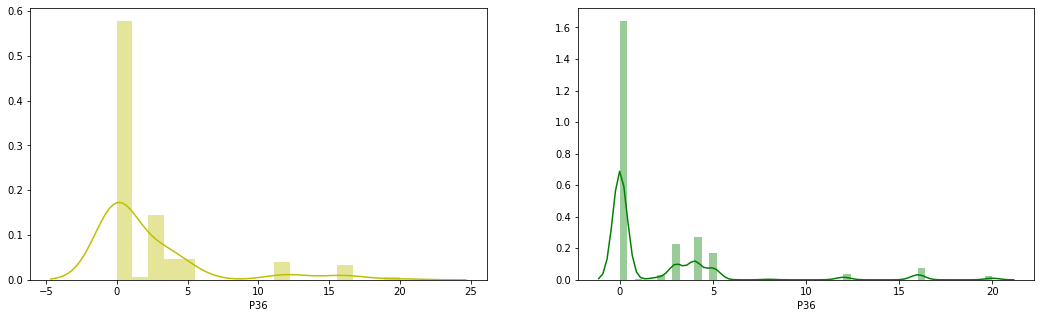

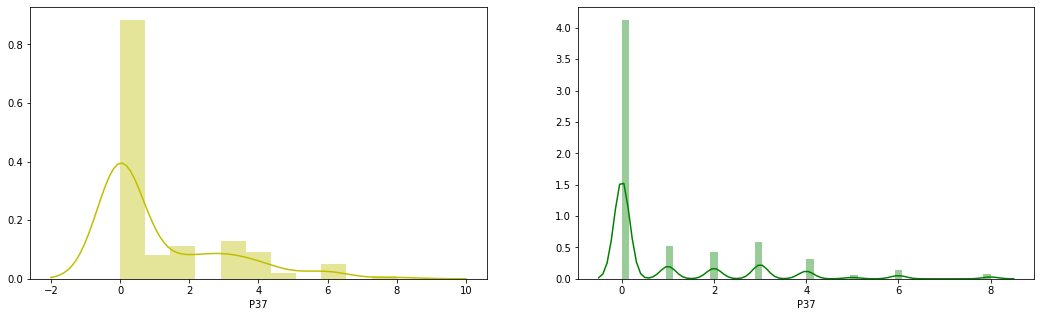

In [27]:
#Lets plot the columns from P1 to P37
plt.rc('figure', max_open_warning = 0)
for i in range(1,38):
    fig, ax = plt.subplots(1,2,figsize=(18,5))
    f1 = sns.distplot(rest_df['P{}'.format(i)],ax=ax[0],color='y')
    f2 = sns.distplot(test_df['P{}'.format(i)],ax=ax[1],color='g')
 

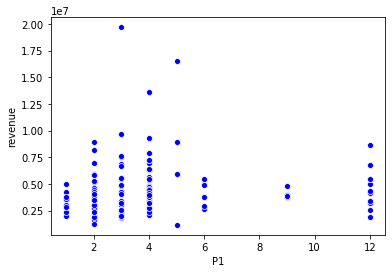

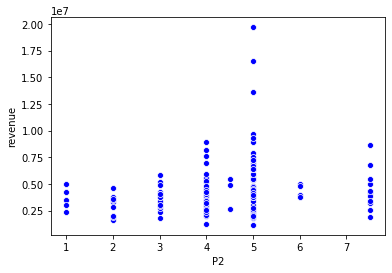

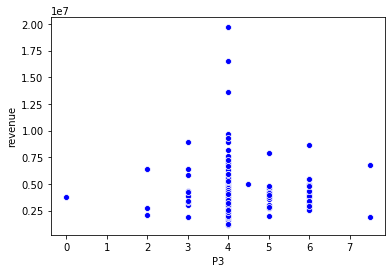

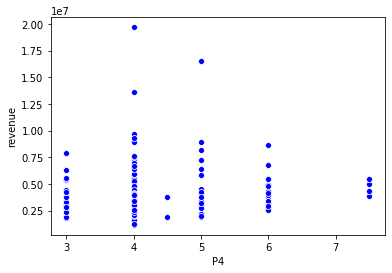

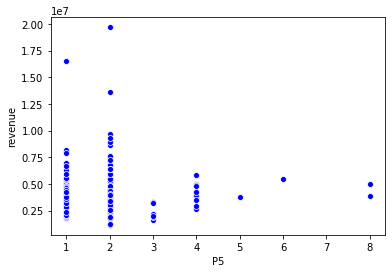

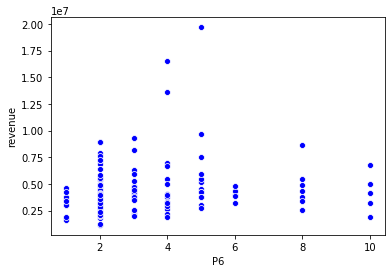

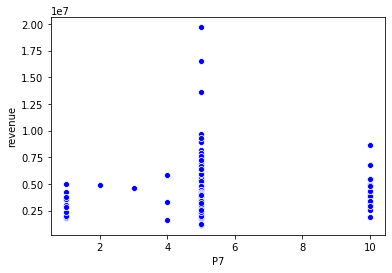

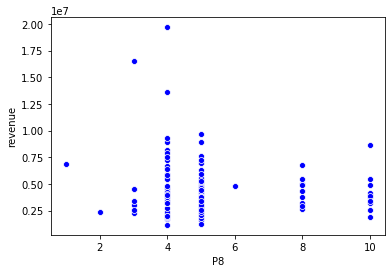

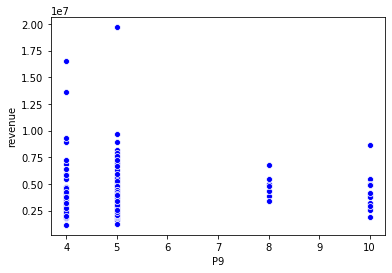

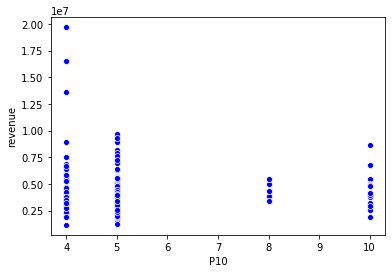

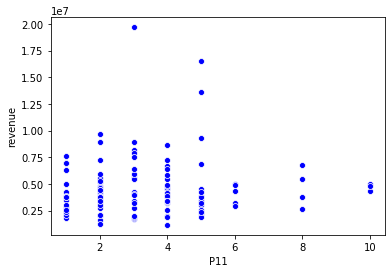

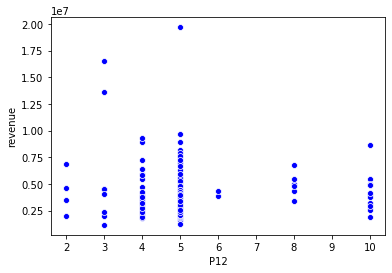

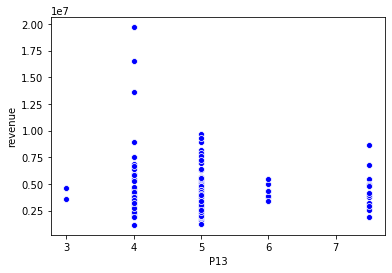

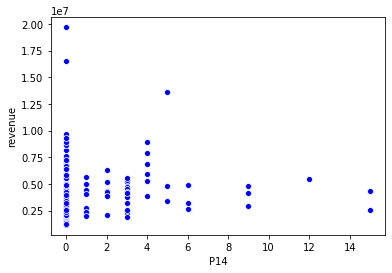

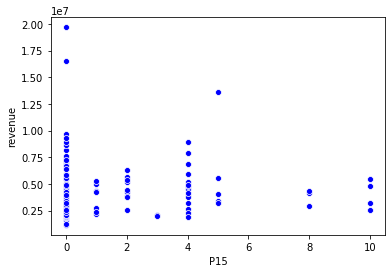

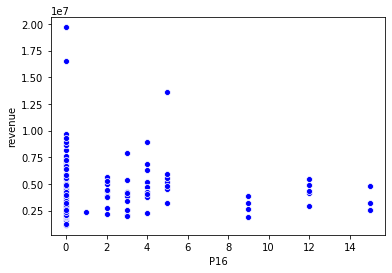

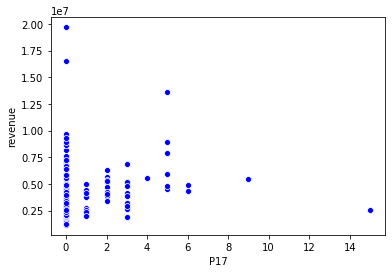

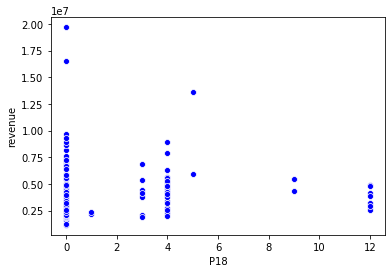

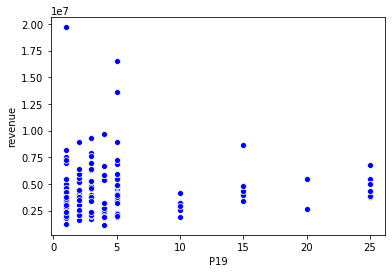

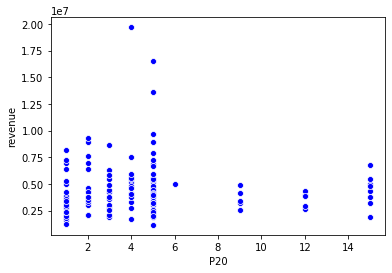

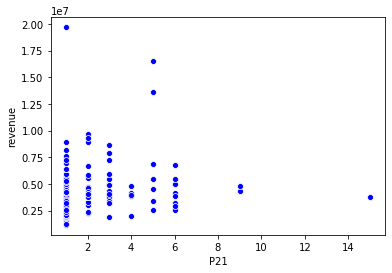

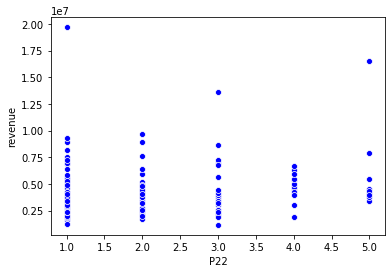

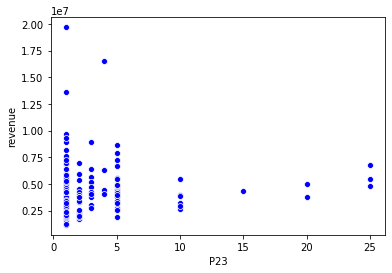

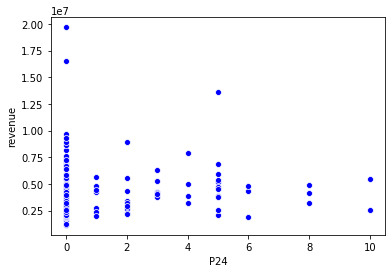

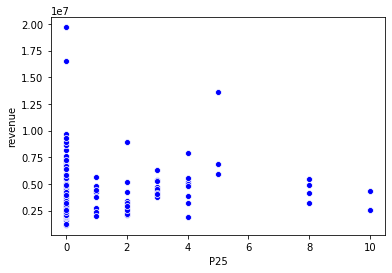

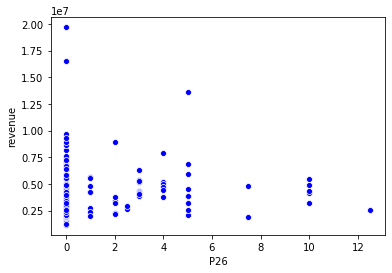

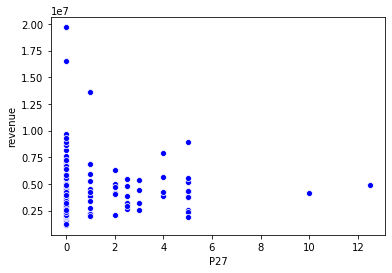

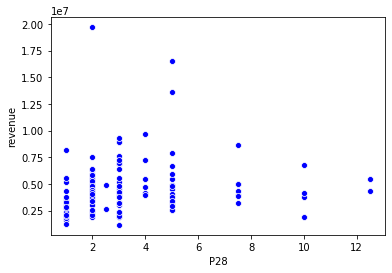

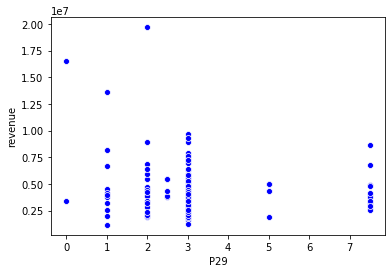

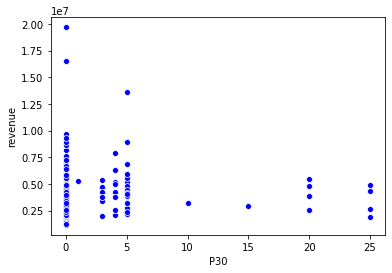

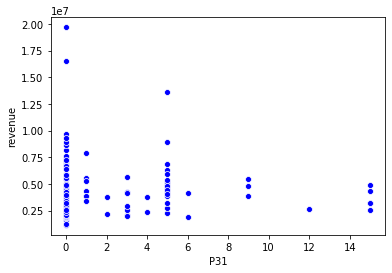

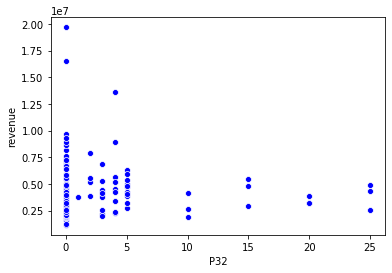

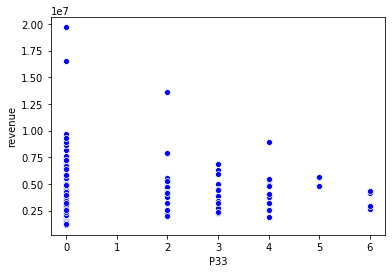

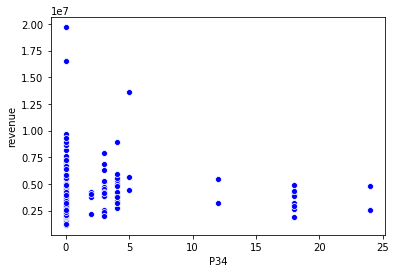

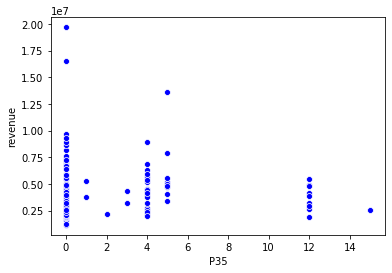

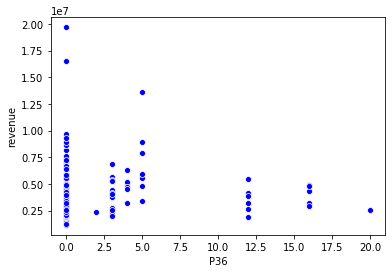

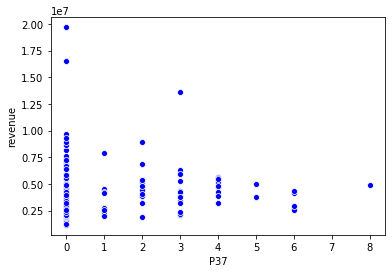

In [28]:

for i in range(1,38):
    sns.scatterplot(rest_df['P{}'.format(i)],rest_df['revenue'],color="b")
    plt.show()

### Correlation

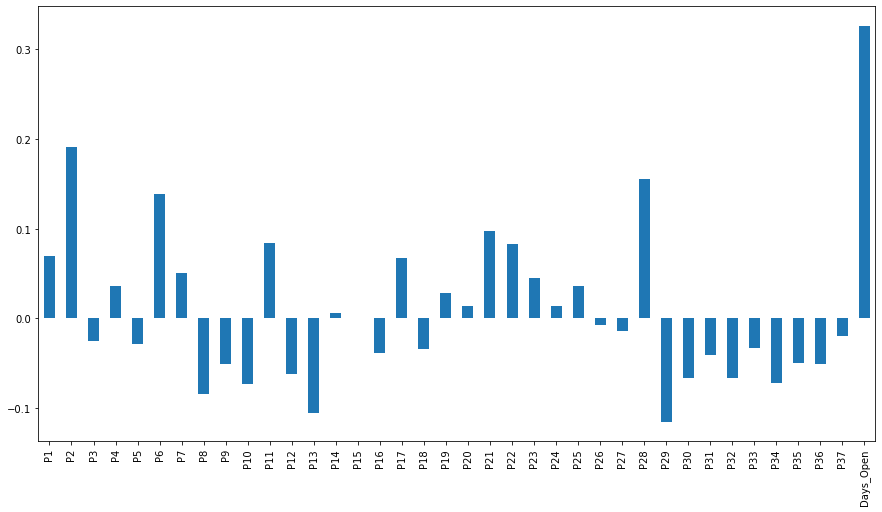

In [29]:
#correlation of target variable 'revenue' with other numberic features
corr = rest_df.corr()['revenue']
plt.figure(figsize=(15,8))
corr.drop('revenue').plot.bar()

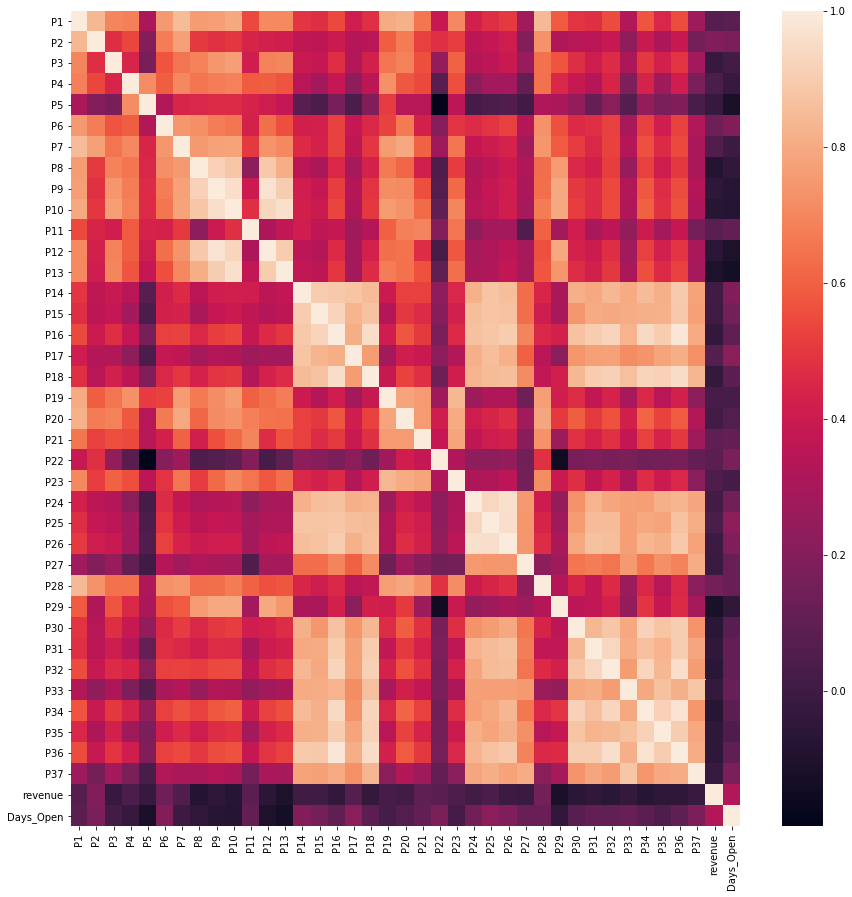

In [30]:
corr_full = rest_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_full)

### Analyse the data with pairplot

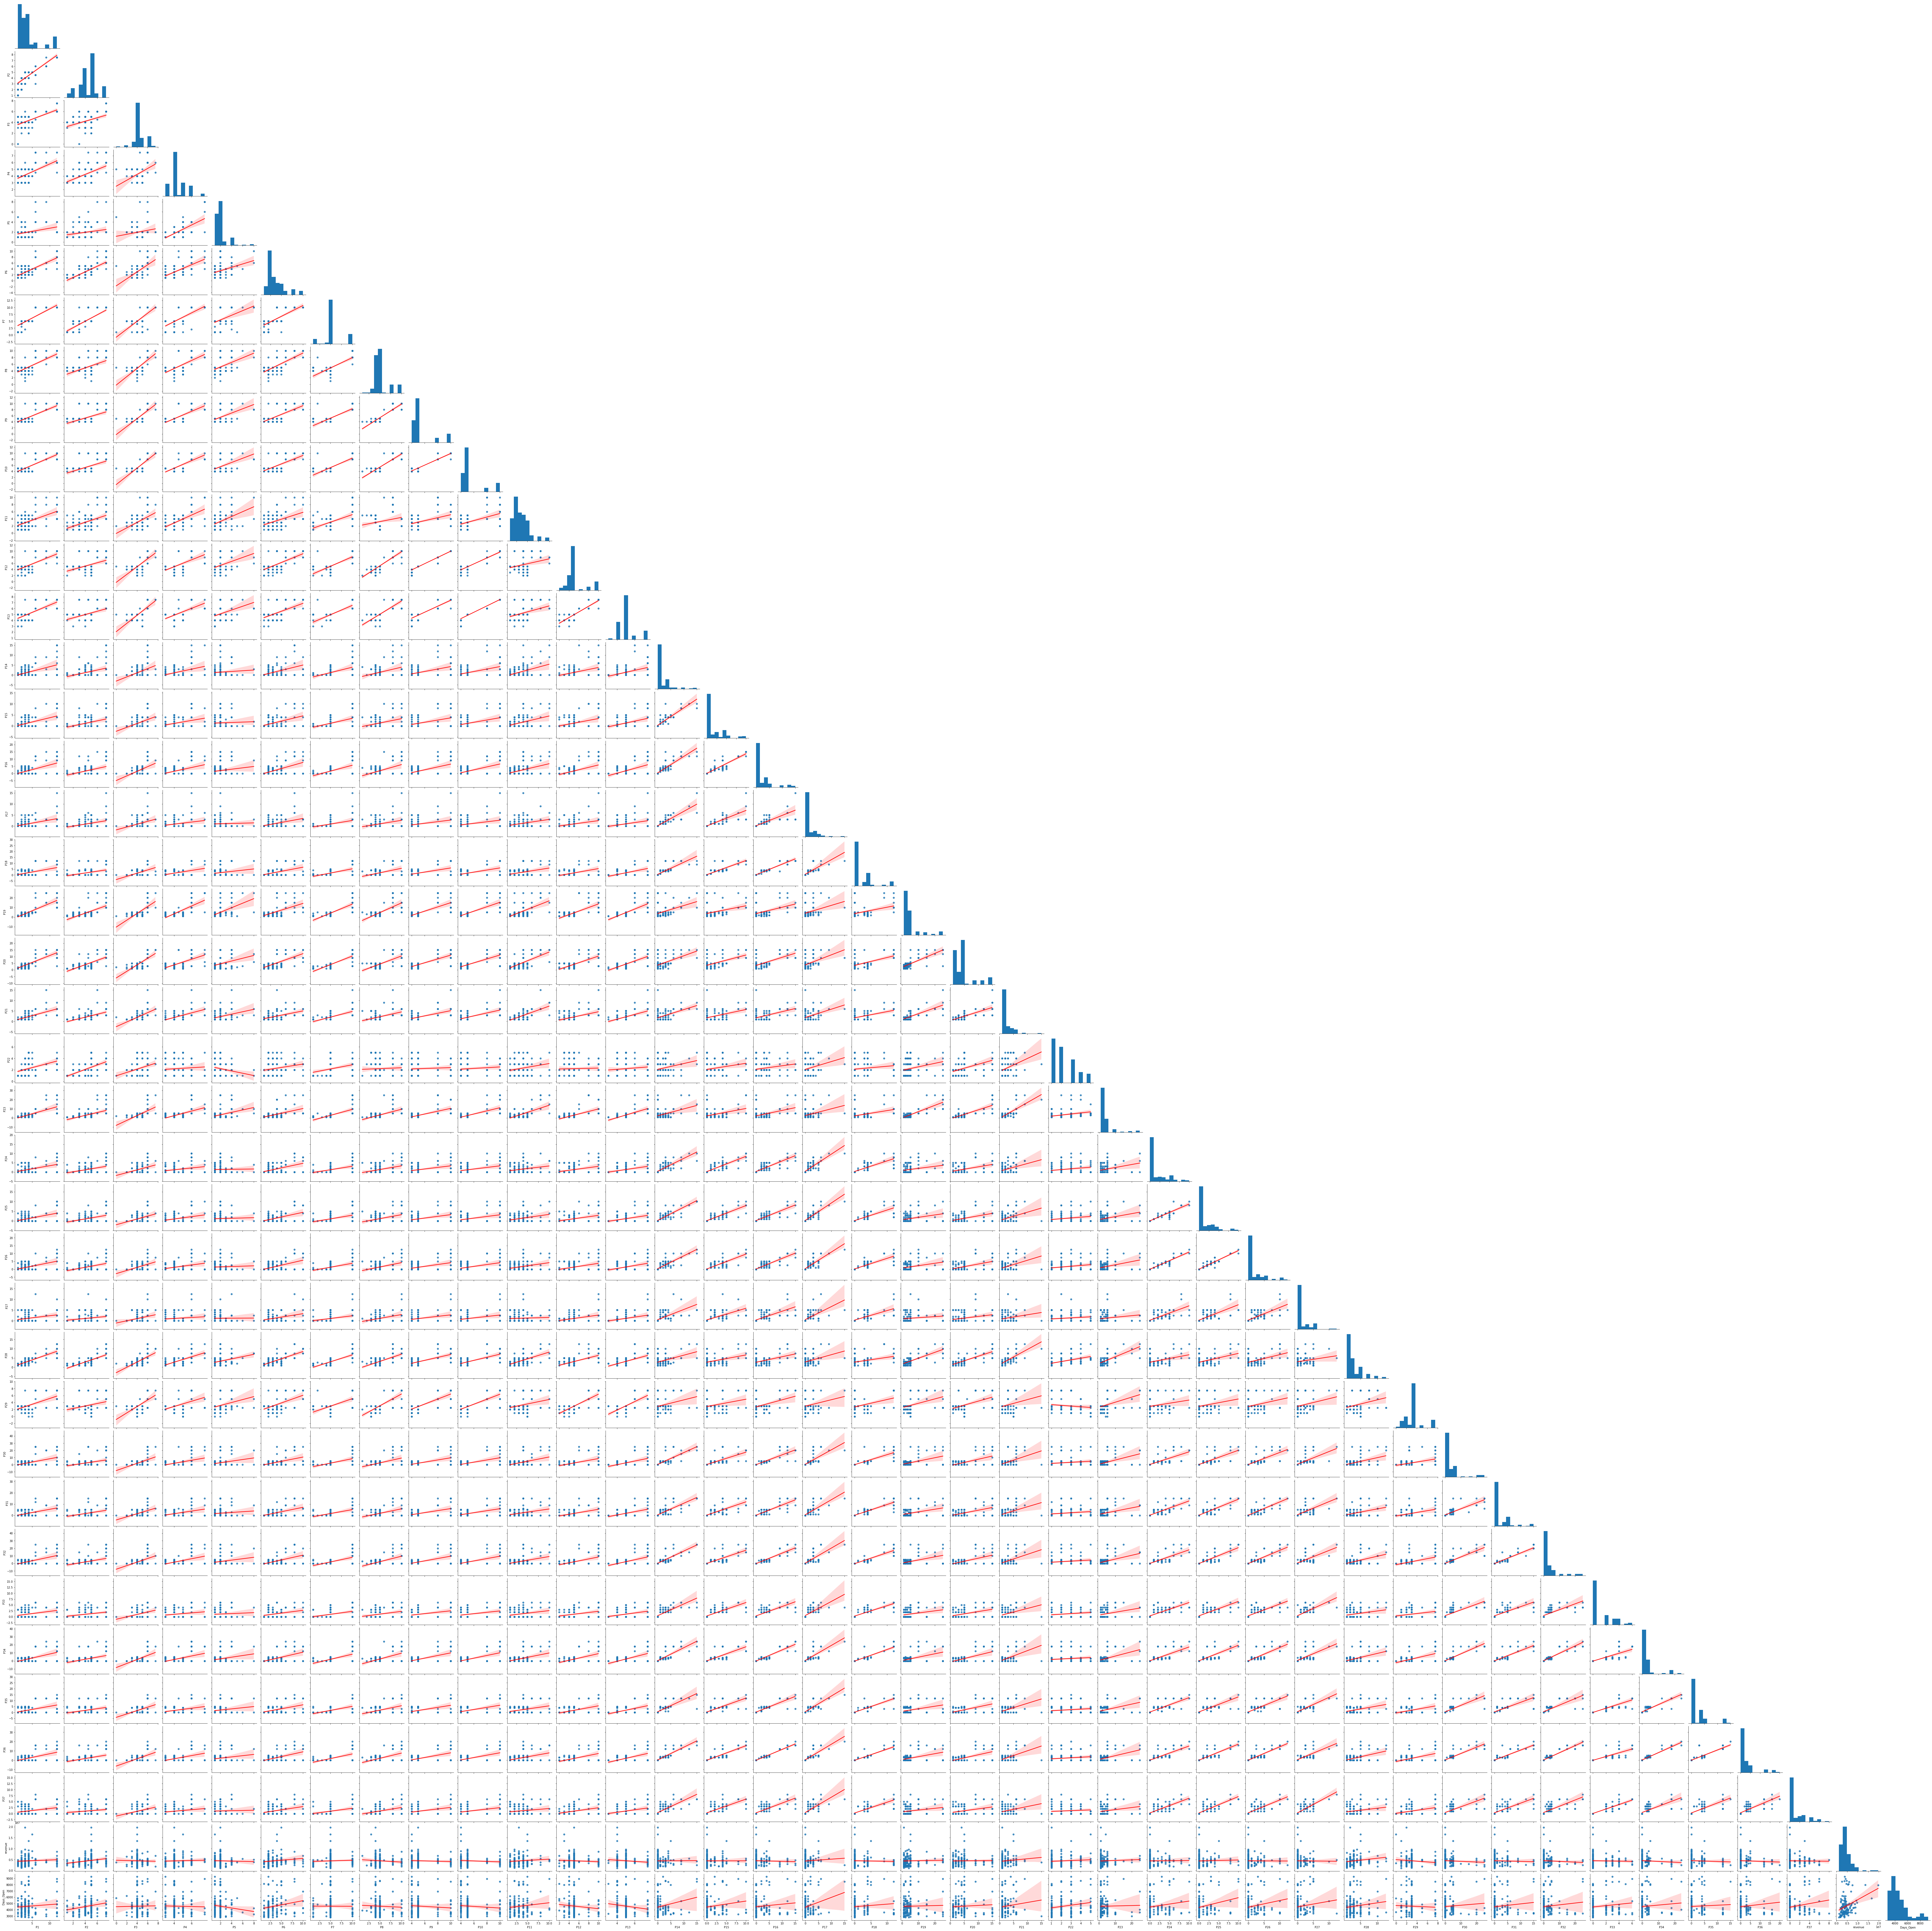

In [31]:
sns.pairplot(data=rest_df,kind="reg",corner=True, plot_kws={'line_kws':{'color':'red'}})

#### Analysis on the 'Revenue' column - target variable

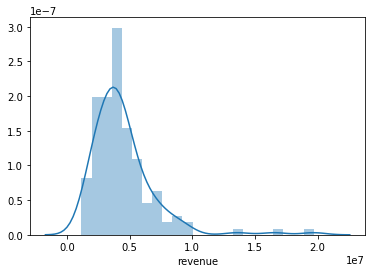

In [32]:
sns.distplot(rest_df['revenue'])

Its distribution is right skewed. There are some restaurents whose revenue is too much higher than the general revenue. The number of restaurents having higher revenue exponentially decreases with the increase in revenue.<br>
we have to check for outliers in this revenue data because outliers can impact the performance of the regression model.<br>
A log transformation can help to fit a very skewed distribution into a Gaussian one.

Text(0.5, 1.0, 'log1+revenue Distribution')

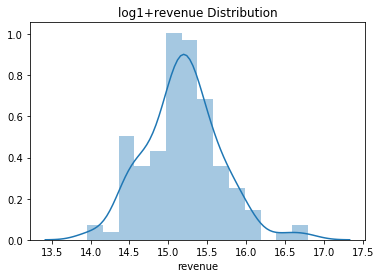

In [33]:
#np.log1p -- > This mathematical function helps user to calculate natural logarithmic value of x+1 
#              where x belongs to all the input array elements.
sns.distplot(np.log1p(rest_df['revenue']))
plt.title("log1+revenue Distribution")

It looks more of a normal distribution after applying log. 

In [34]:
rest_df['revenue'] = np.log1p(rest_df['revenue'])

### Check for Zeroes in the columns P1 to P37

In [35]:
rest_df.eq(0).any()

City Group    False
Type          False
P1            False
P2            False
P3             True
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14            True
P15            True
P16            True
P17            True
P18            True
P19           False
P20           False
P21           False
P22           False
P23           False
P24            True
P25            True
P26            True
P27            True
P28           False
P29            True
P30            True
P31            True
P32            True
P33            True
P34            True
P35            True
P36            True
P37            True
revenue       False
Days_Open     False
dtype: bool

In [36]:
# Use any Imputer class from scikit learn to fix these zero values.
# IterativeImputer : A strategy for imputing missing values by 
# modeling each feature with missing values as a function of other features in a round-robin fashion

imputer = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=1)

for i in range (1,38):
    p_col = ['P'+str(i)]
    rest_df[p_col] = np.round(imputer.fit_transform(rest_df[p_col]))
    test_df[p_col] = np.round(imputer.fit_transform(test_df[p_col]))

In [37]:
#check
rest_df.eq(0).any().any()

False

### Encoding categorical features

In [38]:
enc_col = rest_df.select_dtypes(include=[object]).columns
enc_col

Index(['City Group', 'Type'], dtype='object')

In [39]:
rest_df = pd.get_dummies(rest_df, columns=enc_col, drop_first=False)
test_df = pd.get_dummies(test_df, columns=enc_col, drop_first=False)
rest_df.head()

P1   P2   P3   P4   P5   P6    P7   P8    P9   P10  ...   P35   P36  P37  \
0  4.0  5.0  4.0  4.0  2.0  2.0   5.0  4.0   5.0   5.0  ...   4.0   3.0  4.0   
1  4.0  5.0  4.0  4.0  1.0  2.0   5.0  5.0   5.0   5.0  ...   6.0   6.0  3.0   
2  2.0  4.0  2.0  5.0  2.0  3.0   5.0  5.0   5.0   5.0  ...   6.0   6.0  3.0   
3  6.0  4.0  6.0  6.0  4.0  4.0  10.0  8.0  10.0  10.0  ...  12.0  12.0  6.0   
4  3.0  4.0  3.0  4.0  2.0  2.0   5.0  5.0   5.0   5.0  ...   4.0   3.0  3.0   

     revenue  Days_Open  City Group_Big Cities  City Group_Other  Type_DT  \
0  15.547830       8103                      1                 0        0   
1  15.750379       4969                      1                 0        0   
2  14.535971       3119                      0                 1        0   
3  14.799651       3520                      0                 1        0   
4  15.278005       4519                      0                 1        0   

   Type_FC  Type_IL  
0        0        1  
1        1        0  
2        0        1  
3        0        1  
4        0        1  

[5 rows x 44 columns]

### Extract features and target variable

In [40]:
X = rest_df.drop('revenue',axis=1)
y= rest_df['revenue']
X.shape,y.shape

((137, 43), (137,))

### Spilt the dataset for training and validating

In [41]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=7)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((109, 43), (109,), (28, 43), (28,))

## Build Models!

In [42]:
# As per our data analysis, most of the data doesnt seems to fit in a linear model, 
#if we consider polynomialFeatures there can be a chance of curse of dimensionality since the dataset is too small.
# so lets first consider Ridge regression


### Ridge Regression

In [93]:
#Use GRidSearchCV to fit the best fit params for the Ridge Regression
params_grid = {
    'alpha' : [0.25,0.5,1,5],
    'fit_intercept' : [True, False],
    'solver' : ['svd','cholesky','lsqr','sparse_cg','saga']
}
ridge_regressor = GridSearchCV(Ridge(random_state=1),params_grid,
                               scoring='neg_root_mean_squared_error',
                               cv=3,n_jobs=-1)
ridge_regressor.fit(X_train, y_train)
print(ridge_regressor.best_params_)

{'alpha': 0.25, 'fit_intercept': True, 'solver': 'saga'}


In [94]:
y_pred_ridge = ridge_regressor.predict(X_test)
ridge_r2_score= r2_score(y_test,y_pred_ridge)
print("R2_score-Testing-Ridge with PolynomailFeatures:",ridge_r2_score)

R2_score-Testing-Ridge with PolynomailFeatures: 0.18754728165280143


In [95]:
y_pred_train_ridge = ridge_regressor.predict(X_train)
                                             
RMSE_train_ridge = np.sqrt(mean_squared_error(y_train,y_pred_train_ridge))
RMSE_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("RMSE-Training-Ridge with PolynomailFeatures:",RMSE_train_ridge)
print("RMSE-Testing -Ridge with PolynomailFeatures:",RMSE_test_ridge)                                             

RMSE-Training-Ridge with PolynomailFeatures: 0.4538386511048294
RMSE-Testing -Ridge with PolynomailFeatures: 0.4429055952677235


**R2_score-Testing-Ridge with PolynomailFeatures: 0.19**

### ElasticNet Regression

In [103]:
#params_grid = {
#    'alpha' : [0.1,0.5, 1, 5,7],
#    'fit_intercept' : [True, False],
#    'l1_ratio' :[0.25,0.5,0.75,0.8] ,
#}
#enet_regressor = GridSearchCV(ElasticNet(),params_grid,scoring='neg_root_mean_squared_error',cv=5,n_jobs=1)
#enet_regressor.fit(X_train_poly_scaled, y_train)
#enet_regressor.best_params_

enetCV_reg = ElasticNetCV(alphas=[0.01,0.1,0.5,1],l1_ratio=[.1, .5],
                          tol=1e-7,cv=10,n_jobs=-1,random_state=1)
enetCV_reg.fit(X_train, y_train)
print('alpha:',enetCV_reg.alpha_)
print('l1_ratio:',enetCV_reg.l1_ratio_)
print('n_iter:',enetCV_reg.n_iter_)


alpha: 1.0
l1_ratio: 0.5
n_iter: 2


/home/paul/.virtualenvs/aiml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011865957729995102, tolerance: 2.0845915116523942e-06
  tol, rng, random, positive)
/home/paul/.virtualenvs/aiml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1826893212329992e-05, tolerance: 2.336076191296939e-06
  tol, rng, random, positive)
/home/paul/.virtualenvs/aiml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.146984823310106e-05, tolerance: 2.3647700558388617e-06
  tol, rng, random, positive)
/home/paul/.virtualenvs/aiml/lib/python3.6/site-packages/sklearn/linear_model/

In [104]:
y_pred_enet_test = enetCV_reg.predict(X_test)
y_pred_enet_train = enetCV_reg.predict(X_train)

In [105]:
RMSE_train_enet = np.sqrt(mean_squared_error(y_train,y_pred_enet_train))
RMSE_test_enet = np.sqrt(mean_squared_error(y_test,y_pred_enet_test))
print("RMSE-Training-ElasticNet with PolynomailFeatures:",RMSE_train_enet)
print("RMSE-Testing -ElasticNet with PolynomailFeatures:",RMSE_test_enet)
#
enet_r2_score= r2_score(y_test,y_pred_enet_test)
print("R2_score-Testing-ElasticNet with PolynomailFeatures:",enet_r2_score)

RMSE-Training-ElasticNet with PolynomailFeatures: 0.45511723096431206
RMSE-Testing -ElasticNet with PolynomailFeatures: 0.4447730467949084
R2_score-Testing-ElasticNet with PolynomailFeatures: 0.18068164412623078


**R2_score-Testing-ElasticNet with PolynomailFeatures :0.18**

1


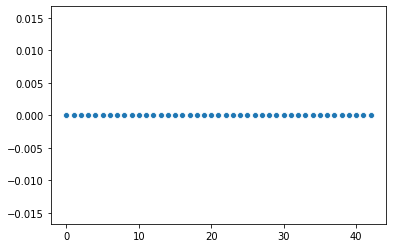

In [106]:
#feauture selection ,feature importance using ElasticNet model
enetCV_reg_coef = np.abs(enetCV_reg.coef_)
n_features = (enetCV_reg.coef_ >0 ).sum()
print(n_features)
sns.scatterplot(data=enetCV_reg_coef)

### KNeighborsRegressor

In [107]:
params_knn = {'n_neighbors':[5,7,9,11,13]}

knn_reg_CV = Pipeline([
                ('scaler_knn', StandardScaler()), 
                ('grid_knn', GridSearchCV(KNeighborsRegressor(),
                                 param_grid=params_knn,
                                 cv=3,n_jobs=-1,scoring='neg_root_mean_squared_error',
                                 refit=True))
                ])

knn_reg_CV.fit(X_train,y_train)

Pipeline(steps=[('scaler_knn', StandardScaler()),
                ('grid_knn',
                 GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
                              param_grid={'n_neighbors': [5, 7, 9, 11, 13]},
                              scoring='neg_root_mean_squared_error'))])

In [108]:
knn_reg_CV['grid_knn'].best_params_

{'n_neighbors': 13}

In [109]:
y_pred_train_knn = knn_reg_CV.predict(X_train)
y_pred_test_knn = knn_reg_CV.predict(X_test)

In [110]:
RMSE_train_knn = np.sqrt(mean_squared_error(y_train,y_pred_train_knn))
RMSE_test_knn = np.sqrt(mean_squared_error(y_test,y_pred_test_knn))
print("RMSE-Training-KNN :",RMSE_train_knn)
print("RMSE-Testing -KNN :",RMSE_test_knn)
#
KNN_r2_score= r2_score(y_test,y_pred_test_knn)
print("R2_score-Testing-KNN:",KNN_r2_score)

RMSE-Training-KNN : 0.43050148580455255
RMSE-Testing -KNN : 0.4194601556662776
R2_score-Testing-KNN: 0.2712858714248969


we are getting better performance of KNN model without polynomialFeatures.<br>
**KNN R2 Score Test : 0.27**

### Support Vector Regression 

In [61]:
param_grid_svr = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
                  "C": [1e0, 1e1, 1e2, 1e3],
                  "gamma": np.logspace(-2, 2, 5)
                            }
                      
# When refit=True, the GridSearchCV will be refitted with the best scoring parameter combination 
#on the whole data that is passed in fit().

svr_reg = Pipeline([
                   ('scaler', StandardScaler()),
                   ('grid_svr',GridSearchCV(SVR(),param_grid_svr,scoring='neg_root_mean_squared_error',
                                            cv=5,n_jobs=-1,refit=True))
                   ])
svr_reg.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('grid_svr',
                 GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                              param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                                          'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                          'kernel': ('linear', 'poly', 'rbf',
                                                     'sigmoid')},
                              scoring='neg_root_mean_squared_error'))])

In [62]:
svr_reg['grid_svr'].best_params_

{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [63]:
y_pred_svr_train = svr_reg.predict(X_train)
y_pred_svr_test = svr_reg.predict(X_test)
print('RMSE of SVR-Training:',np.sqrt(mean_squared_error(y_train,y_pred_svr_train)))
print('RMSE of SVR-Testing:',np.sqrt(mean_squared_error(y_test,y_pred_svr_test)))
print('R2 Score- Test- SVR: ', r2_score(y_test,y_pred_svr_test))


RMSE of SVR-Training: 0.2230415574857251
RMSE of SVR-Testing: 0.4058315475890684
R2 Score- Test- SVR:  0.3178696533661717


**Support Vector Regression R2 Score- Test: 0.31** 

### RandomForest Regressor

In [64]:
params_grid_rf={'n_estimators':[150,300,500],'max_depth':[5,7,9],'min_samples_split':[5,10,20,30]}
rf_reg = GridSearchCV(RandomForestRegressor(random_state=1),params_grid_rf,cv=3,n_jobs=-1,scoring='neg_root_mean_squared_error')
rf_reg.fit(X_train,y_train)
rf_reg.best_params_

{'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 300}

In [65]:
y_pred_train_rf = rf_reg.predict(X_train)
y_pred_test_rf = rf_reg.predict(X_test)

In [66]:
RMSE_train_rf = np.sqrt(mean_squared_error(y_train,y_pred_train_rf))
RMSE_test_rf = np.sqrt(mean_squared_error(y_test,y_pred_test_rf))
print("RMSE-Training-RandomForestRegressor :",RMSE_train_rf)
print("RMSE-Testing -RandomForestRegressor :",RMSE_test_rf)
#
rf_r2_score= r2_score(y_test,y_pred_test_rf)
print("R2_score-Testing-RandomForestRegressor:",rf_r2_score)

RMSE-Training-RandomForestRegressor : 0.20958439310918958
RMSE-Testing -RandomForestRegressor : 0.38293430829396496
R2_score-Testing-RandomForestRegressor: 0.3926705817308367


**RandomForestRegressor R2-Score : 0.39**

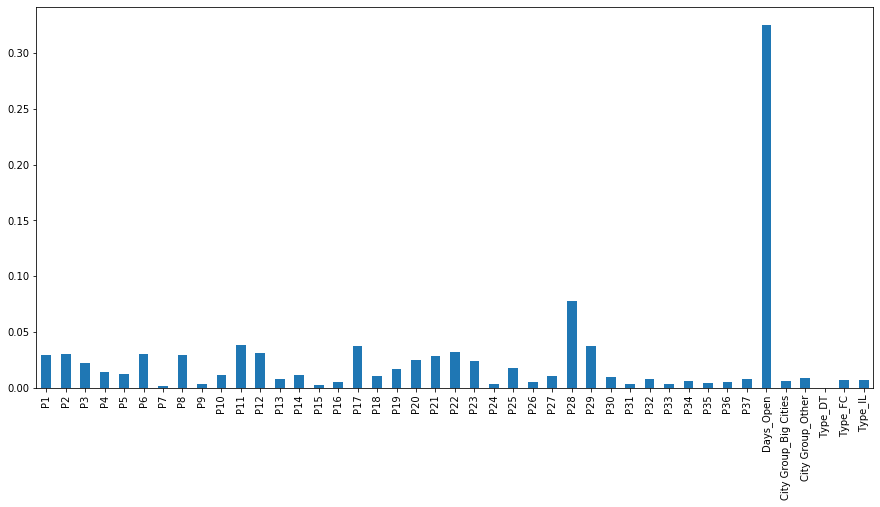

In [67]:
rf_reg = RandomForestRegressor(n_estimators=300,min_samples_split=5,max_depth=9,random_state=1)
rf_reg.fit(X_train,y_train)
rf_reg_feature_imp  = pd.Series(index=X_train.columns,data=np.abs(rf_reg.feature_importances_))
rf_reg_feature_imp.plot(kind='bar',figsize=(15,7))

In [68]:
feature_imp = pd.DataFrame(
    rf_reg.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_imp

importance
Days_Open                0.325141
P28                      0.077545
P11                      0.038540
P17                      0.037258
P29                      0.036939
P22                      0.032188
P12                      0.031166
P2                       0.029976
P6                       0.029834
P1                       0.029126
P8                       0.028917
P21                      0.028546
P20                      0.024805
P23                      0.023480
P3                       0.021585
P25                      0.017145
P19                      0.016280
P4                       0.013848
P5                       0.011978
P14                      0.011616
P10                      0.010894
P27                      0.010755
P18                      0.010057
P30                      0.009738
City Group_Other         0.008694
P37                      0.007881
P32                      0.007528
P13                      0.007370
Type_IL                  0.007202
Type_FC                  0.006698
P34                      0.006202
City Group_Big Cities    0.006035
P36                      0.005085
P26                      0.004696
P16                      0.004676
P35                      0.004277
P9                       0.003442
P33                      0.003393
P24                      0.003024
P31                      0.002818
P15                      0.002231
P7                       0.001390
Type_DT                  0.000000

In [69]:
sfm = SelectFromModel(rf_reg, threshold=0.005)
sfm.fit(X_train, y_train)
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
print('Shape of new X_train:',X_important_train.shape)
# Create a new random forest classifier for the most important features
rfc_imp = GridSearchCV(RandomForestRegressor(random_state=1),params_grid_rf,cv=3,n_jobs=-1,scoring='neg_root_mean_squared_error')

# Train the new classifier on the new dataset containing the most important features
rfc_imp.fit(X_important_train, y_train)

Shape of new X_train: (109, 33)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9],
                         'min_samples_split': [5, 10, 20, 30],
                         'n_estimators': [150, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [70]:
rfc_imp.best_params_

{'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 300}

In [71]:
y_pred_train_rfc_imp = rfc_imp.predict(X_important_train)
y_pred_test_rfc_imp = rfc_imp.predict(X_important_test)

In [72]:
RMSE_train_rfc_imp = np.sqrt(mean_squared_error(y_train,y_pred_train_rfc_imp))
RMSE_test_rfc_imp = np.sqrt(mean_squared_error(y_test,y_pred_test_rfc_imp))
print("RMSE-Training-ExtraTrees :",RMSE_train_rfc_imp)
print("RMSE-Testing -ExtraTrees :",RMSE_test_rfc_imp)
#
rfc_imp_r2_score= r2_score(y_test,y_pred_test_rfc_imp)
print("R2_score-Testing-ExtraTrees:",rfc_imp_r2_score)

RMSE-Training-ExtraTrees : 0.20917950212846412
RMSE-Testing -ExtraTrees : 0.38456682959880006
R2_score-Testing-ExtraTrees: 0.38748122354415915


**R2 score with full features (43 columns):  0.39267 ~ 0.39**<br>
**R2 Score with selected features(33 columns) : 0.38748 ~ 0.39**

### Extra-Trees Regressor

In [73]:
params_grid_et={'n_estimators':[100,150,300,500],'max_depth':[5,7,9],'min_samples_split':[5,10,20,30]}
ET_reg = GridSearchCV(ExtraTreesRegressor(random_state=1),params_grid_et,cv=3,n_jobs=-1,scoring='neg_root_mean_squared_error')
ET_reg.fit(X_train,y_train)
ET_reg.best_params_

{'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 150}

In [74]:
y_pred_train_et = ET_reg.predict(X_train)
y_pred_test_et = ET_reg.predict(X_test)

In [75]:
RMSE_train_et = np.sqrt(mean_squared_error(y_train,y_pred_train_et))
RMSE_test_et = np.sqrt(mean_squared_error(y_test,y_pred_test_et))
print("RMSE-Training-ExtraTrees :",RMSE_train_et)
print("RMSE-Testing -ExtraTrees :",RMSE_test_et)
#
et_r2_score= r2_score(y_test,y_pred_test_et)
print("R2_score-Testing-ExtraTrees:",et_r2_score)

RMSE-Training-ExtraTrees : 0.17744622713439276
RMSE-Testing -ExtraTrees : 0.37633283230630055
R2_score-Testing-ExtraTrees: 0.4134298200832557


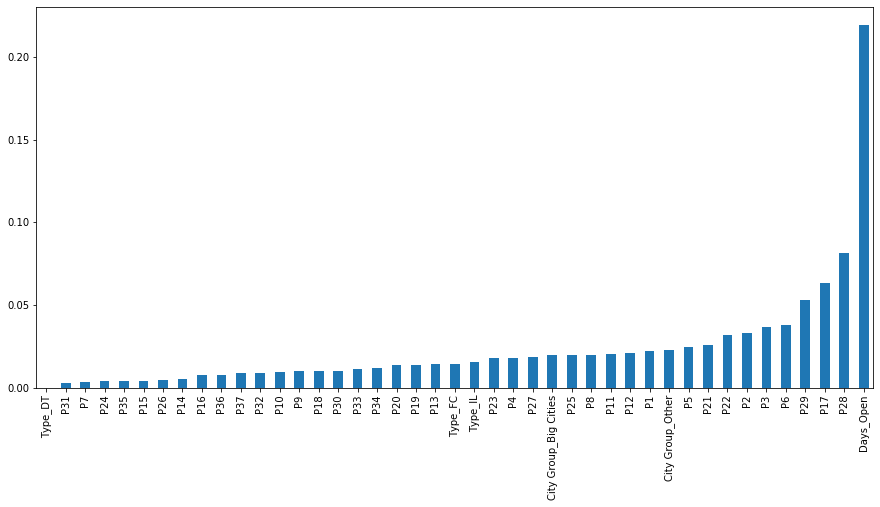

In [76]:
ET_reg = ExtraTreesRegressor(n_estimators=150,min_samples_split=5,max_depth=7,random_state=1)
ET_reg.fit(X_train,y_train)

et_feature_imp= pd.Series(index = X_train.columns, data = np.abs(ET_reg.feature_importances_))
et_feature_imp.sort_values().plot(kind='bar',figsize=(15,7))

We can see the most important feature is Days_Open feature and least imp feature is P31

**R2Score-Test-ExtraTrees: 0.41**

In [77]:
#Feature importance based on feature permutation¶
from sklearn.inspection import permutation_importance
result = permutation_importance(ET_reg, X_test, y_test,
                        n_repeats=10,
                        random_state=1)

In [78]:
result

{'importances_mean': array([-2.21902026e-03,  1.16381440e-02, -4.68529182e-03, -1.59655405e-03,
         1.14268201e-02,  7.18784570e-04, -4.31028825e-04,  9.37757426e-04,
        -3.41479807e-03,  5.86004513e-05, -3.38096290e-03, -5.95836208e-03,
         3.84586022e-03,  4.59476094e-05,  2.13375971e-03, -6.72004436e-04,
        -1.22935967e-04, -1.01493323e-03,  7.97401403e-04,  7.50470012e-03,
         3.37343374e-02,  1.96073948e-03,  6.66773821e-03,  5.79857935e-04,
         3.89055132e-03, -1.00179757e-04, -3.09372327e-04,  1.90118471e-01,
         3.44683946e-02,  3.46909053e-03, -2.13401876e-04,  1.76541952e-03,
         8.37658439e-04,  3.47061634e-04, -2.30856731e-04, -3.70059172e-03,
         6.69930508e-04,  2.64207911e-01,  7.29438670e-03,  8.75591817e-03,
         0.00000000e+00, -8.84293006e-03, -2.58537798e-02]),
 'importances_std': array([0.00771634, 0.01323752, 0.00855202, 0.00480165, 0.01177507,
        0.01342773, 0.00155202, 0.00707744, 0.0027518 , 0.00297676,
    

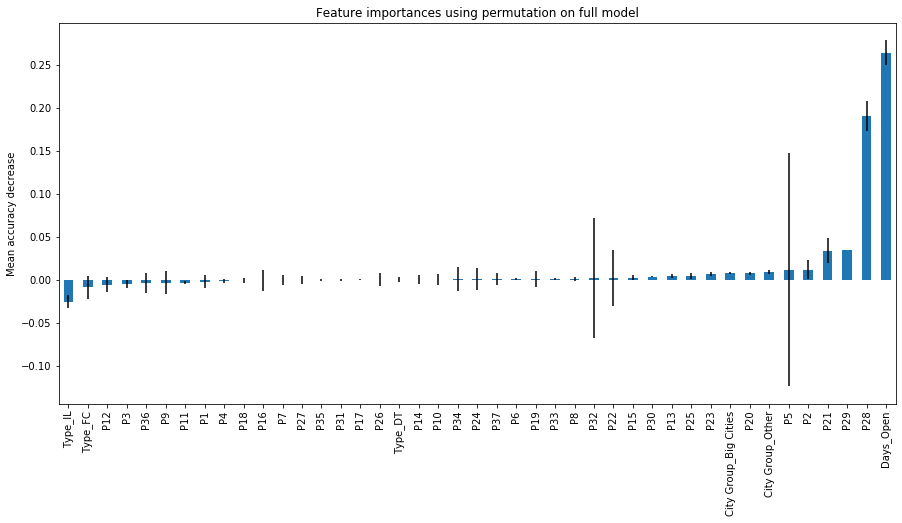

In [79]:
feature_names = X_train.columns
et_imp = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots(figsize=(15,7))
et_imp.sort_values().plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.show()

In [80]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=ET_reg, step=1, cv=3,
              scoring='neg_root_mean_squared_error',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y_train)
#The number of selected features with cross-validation.
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 43


In [81]:
rfecv.get_support(True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

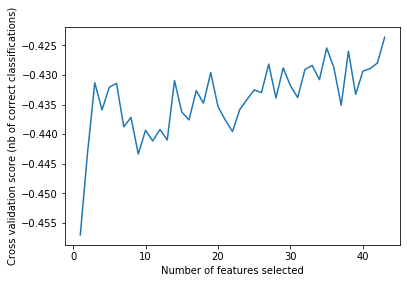

In [82]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

###  Gradient Boosting

In [83]:
params_grid_gb = {'n_estimators':[50,150,300],'learning_rate': [0.01,0.1,0.25,0.5,0.75,1]}
gb_reg= GridSearchCV(GradientBoostingRegressor(random_state=1),params_grid_gb,scoring='neg_root_mean_squared_error',cv=3,n_jobs=-1)
gb_reg.fit(X_train,y_train)
gb_reg.best_params_

{'learning_rate': 0.01, 'n_estimators': 150}

In [84]:
y_pred_train_gb = gb_reg.predict(X_train)
y_pred_test_gb = gb_reg.predict(X_test)

In [85]:
RMSE_train_gb = np.sqrt(mean_squared_error(y_train,y_pred_train_gb))
RMSE_test_gb = np.sqrt(mean_squared_error(y_test,y_pred_test_gb))
print("RMSE-Training-GradientBoost :",RMSE_train_gb)
print("RMSE-Testing -GradientBoost :",RMSE_test_gb)
#
gb_r2_score= r2_score(y_test,y_pred_test_gb)
print("R2_score-Testing-GradientBoost:",gb_r2_score)

RMSE-Training-GradientBoost : 0.32557118201389007
RMSE-Testing -GradientBoost : 0.3799038976619663
R2_score-Testing-GradientBoost: 0.4022449401107516


**R2 Score of Gradient Boosting: 0.40**

### Ensemble the good models together!

In [112]:
estimators = [
#              ('KNeighborsRegressor',knn_reg_CV),
               ('SVM',svr_reg),
              ('GradientBoosting', gb_reg),
              ('ExtraTrees', ET_reg)
             ]
#final_estimator: A regressor which will be used to combine the base estimators
stacking_regressor = StackingRegressor(
    estimators=estimators, final_estimator=RidgeCV())
print('R2 score -Testing-StackingRegressor:',
      stacking_regressor.fit(X_train, y_train).score(X_test, y_test))

R2 score -Testing-StackingRegressor: 0.3387715317212444


In [113]:
pred_stack = stacking_regressor.predict(X_test)
mse_stack= np.sqrt(mean_squared_error(y_test, pred_stack))
print('MSE of stacking regressor:Test:',mse_stack)

MSE of stacking regressor:Test: 0.39956541520595307


**StackingRegressor R2 Score-Test:0.34**

In [114]:
estimators = [
              ('KNeighborsRegressor',knn_reg_CV),
#               ('SVM',svr_reg),
              ('GradientBoosting', gb_reg),
              ('ExtraTrees', ET_reg)
             ]
#final_estimator: A regressor which will be used to combine the base estimators
stacking_regressor2 = StackingRegressor(
    estimators=estimators, final_estimator=RidgeCV())
print('R2 score -Testing-StackingRegressor:',
      stacking_regressor2.fit(X_train, y_train).score(X_test, y_test))

R2 score -Testing-StackingRegressor: 0.3522438553611411


In [115]:
pred_stack = stacking_regressor2.predict(X_test)
mse_stack= np.sqrt(mean_squared_error(y_test, pred_stack))
print('MSE of stacking regressor2:Test:',mse_stack)

MSE of stacking regressor2:Test: 0.39547395710462974


**StackingRegressor2  R2 Score-Test:0.35**

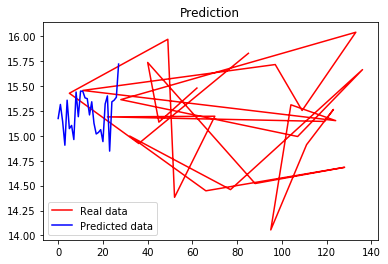

In [116]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(pred_stack, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

## Conclusion

In [117]:
results_df = pd.DataFrame(
    {'Algorithm':['Ridge with Poly','ElasticNet with poly','KNN','SVR','RandomForest','ExtraTrees','GrandientBoost','StackingRegressor','StackingRegressor2'],
     'R2-Score':[0.19,0.18,0.27,0.31,0.39,0.41,0.40,0.34,0.35],
     'MSE': [0.44,0.44,0.42,0.41,0.38,0.38,0.38,0.40,0.40]
     })
results_df=results_df.set_index('Algorithm')
results_df

R2-Score   MSE
Algorithm                           
Ridge with Poly           0.19  0.44
ElasticNet with poly      0.18  0.44
KNN                       0.27  0.42
SVR                       0.31  0.41
RandomForest              0.39  0.38
ExtraTrees                0.41  0.38
GrandientBoost            0.40  0.38
StackingRegressor         0.34  0.40
StackingRegressor2        0.35  0.40

No.of instances to build the model was very small. performances will be better if we train the model with more instances. 
Regression models we tested are and their R2 score and MSE (on validation data) are listed above.


ExtraTrees shows better performance so far with the available train data.

# Submission

In [118]:
submission = pd.DataFrame(columns=['Id','Prediction'])
submission['Id'] = test_df['Id']

In [119]:
ExtraTree_pred = ET_reg.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(ExtraTree_pred)
submission.to_csv('submission_ExTr.csv',index=False)

In [120]:
grb_pred = gb_reg.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(grb_pred)
submission.to_csv('submission_GradBoost.csv',index=False)

In [121]:
stack_pred1 = stacking_regressor.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(stack_pred1)
submission.to_csv('submission_StackReg1.csv',index=False)

In [122]:
stack_pred2 = stacking_regressor2.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(stack_pred2)
submission.to_csv('submission_StackReg2.csv',index=False)